# Data Visualization Chart Types - Practical Implementation

## Table of Contents
1. [Environment Setup](#environment-setup)
2. [Sample Data Generation](#sample-data-generation)
3. [Distribution Charts](#distribution-charts)
4. [Comparison Charts](#comparison-charts)
5. [Relationship Charts](#relationship-charts)
6. [Composition Charts](#composition-charts)
7. [Time Series Charts](#time-series-charts)
8. [Specialized Charts](#specialized-charts)
9. [Advanced Styling and Customization](#advanced-styling)
10. [Interactive Visualizations](#interactive-visualizations)

---

## 1. Environment Setup {#environment-setup}

First, let's import all necessary libraries and set up our environment:


In [1]:
# Core data manipulation and numerical libraries
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Visualization libraries
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# Additional libraries for specialized charts
import squarify  # For treemaps
from scipy import stats
import networkx as nx

# Set style preferences
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

# Configure plot sizes
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("Environment setup complete!")
print("Libraries imported successfully")

Environment setup complete!
Libraries imported successfully


---

## 2. Sample Data Generation {#sample-data-generation}

Let's create comprehensive sample datasets for our demonstrations:

In [2]:
# Set random seed for reproducibility
np.random.seed(42)


# Dataset 1: Sales Data
def generate_sales_data():
    """Generate sample sales data"""
    n_records = 1000

    # Generate dates
    start_date = datetime(2023, 1, 1)
    dates = [start_date + timedelta(days=x) for x in range(365)]

    # Generate categories
    products = ["Electronics", "Clothing", "Books", "Home & Garden", "Sports"]
    regions = ["North", "South", "East", "West", "Central"]

    # Create sales data
    sales_data = []
    for i in range(n_records):
        record = {
            "date": np.random.choice(dates),
            "product": np.random.choice(products),
            "region": np.random.choice(regions),
            "sales": np.random.normal(1000, 300),
            "quantity": np.random.poisson(50),
            "profit_margin": np.random.uniform(0.1, 0.4),
        }
        sales_data.append(record)

    return pd.DataFrame(sales_data)


# Dataset 2: Student Performance Data
def generate_student_data():
    """Generate sample student performance data"""
    n_students = 500

    subjects = ["Math", "Science", "English", "History", "Art"]

    students_data = []
    for i in range(n_students):
        # Generate correlated scores (students good at one subject tend to be good at others)
        base_ability = np.random.normal(75, 15)

        record = {
            "student_id": f"S{i:04d}",
            "age": np.random.randint(16, 19),
            "grade_level": np.random.choice(["10th", "11th", "12th"]),
            "math_score": max(0, min(100, base_ability + np.random.normal(0, 10))),
            "science_score": max(0, min(100, base_ability + np.random.normal(0, 12))),
            "english_score": max(0, min(100, base_ability + np.random.normal(0, 8))),
            "history_score": max(0, min(100, base_ability + np.random.normal(0, 15))),
            "art_score": max(0, min(100, np.random.normal(70, 20))),  # Less correlated
            "study_hours": max(0, np.random.normal(25, 10)),
            "extracurricular": np.random.choice(["Sports", "Music", "Drama", "None"]),
        }
        students_data.append(record)

    return pd.DataFrame(students_data)


# Dataset 3: Financial Data
def generate_stock_data():
    """Generate sample stock price data"""
    dates = pd.date_range(start="2023-01-01", end="2023-12-31", freq="D")

    # Generate realistic stock price movements
    initial_price = 100
    returns = np.random.normal(0.001, 0.02, len(dates))
    prices = [initial_price]

    for ret in returns[1:]:
        new_price = prices[-1] * (1 + ret)
        prices.append(max(10, new_price))  # Minimum price of $10

    # Generate volume (inversely correlated with price changes)
    volumes = []
    for i, price in enumerate(prices):
        if i == 0:
            base_volume = 1000000
        else:
            price_change = abs((prices[i] - prices[i - 1]) / prices[i - 1])
            base_volume = np.random.normal(1000000, 200000) * (1 + price_change * 10)

        volumes.append(max(100000, base_volume))

    return pd.DataFrame(
        {
            "date": dates,
            "price": prices,
            "volume": volumes,
            "high": [p * (1 + abs(np.random.normal(0, 0.01))) for p in prices],
            "low": [p * (1 - abs(np.random.normal(0, 0.01))) for p in prices],
            "open": [p * (1 + np.random.normal(0, 0.005)) for p in prices],
            "close": prices,
        }
    )


# Generate all datasets
sales_df = generate_sales_data()
students_df = generate_student_data()
stock_df = generate_stock_data()

print("Sample datasets generated:")
print(f"Sales data: {len(sales_df)} records")
print(f"Student data: {len(students_df)} records")
print(f"Stock data: {len(stock_df)} records")

# Display sample data
print("\nSales Data Sample:")
print(sales_df.head())
print("\nStudent Data Sample:")
print(students_df.head())
print("\nStock Data Sample:")
print(stock_df.head())

Sample datasets generated:
Sales data: 1000 records
Student data: 500 records
Stock data: 365 records

Sales Data Sample:
        date        product   region        sales  quantity  profit_margin
0 2023-04-13  Home & Garden  Central  1163.122948        52       0.129992
1 2023-03-29         Sports     West   815.371069        41       0.116923
2 2023-12-10  Home & Garden    South   860.974692        46       0.229584
3 2023-02-18          Books     East   860.281074        48       0.392127
4 2023-09-28          Books     West  1767.846409        42       0.384666

Student Data Sample:
  student_id  age grade_level  math_score  science_score  english_score  \
0      S0000   16        10th   55.669833      47.270533      50.436244   
1      S0001   16        12th   74.260488     100.000000      96.648705   
2      S0002   17        10th   57.165236      54.701779      60.084891   
3      S0003   16        11th   64.652137      86.516414      76.806149   
4      S0004   18        10th  

---

## 3. Distribution Charts {#distribution-charts}

### 3.1 Histogram

Creating Matplotlib Histograms...


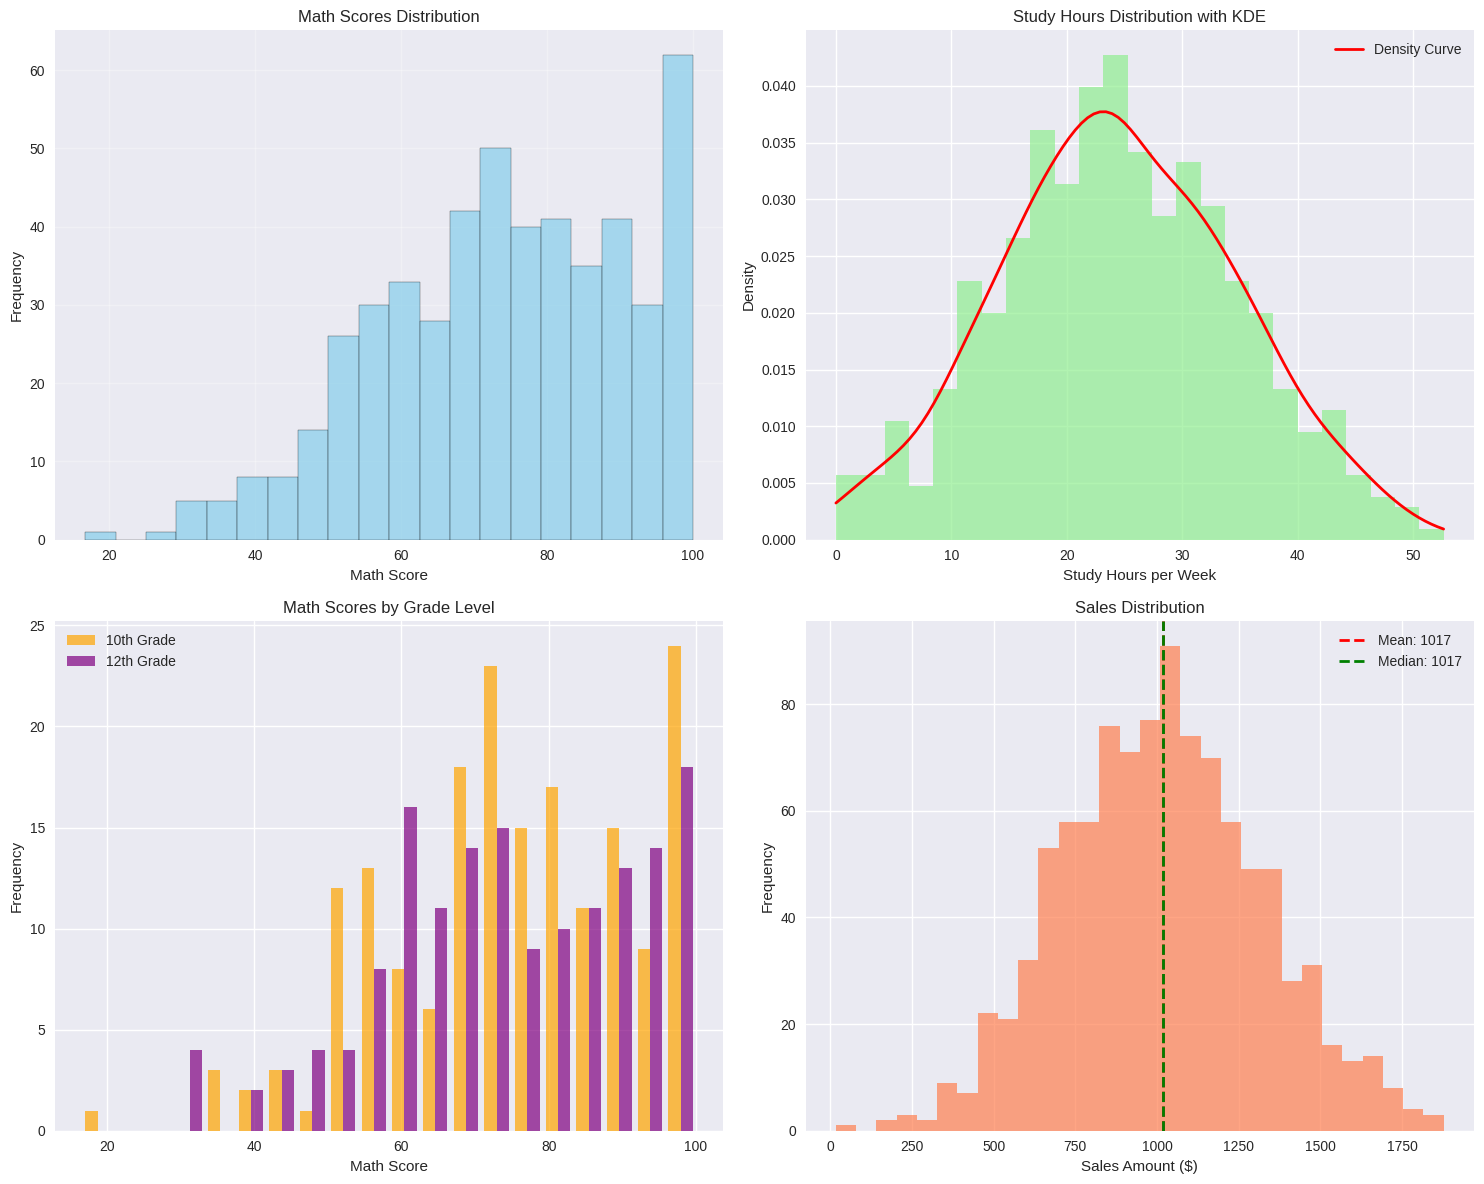

Creating Seaborn Histograms...


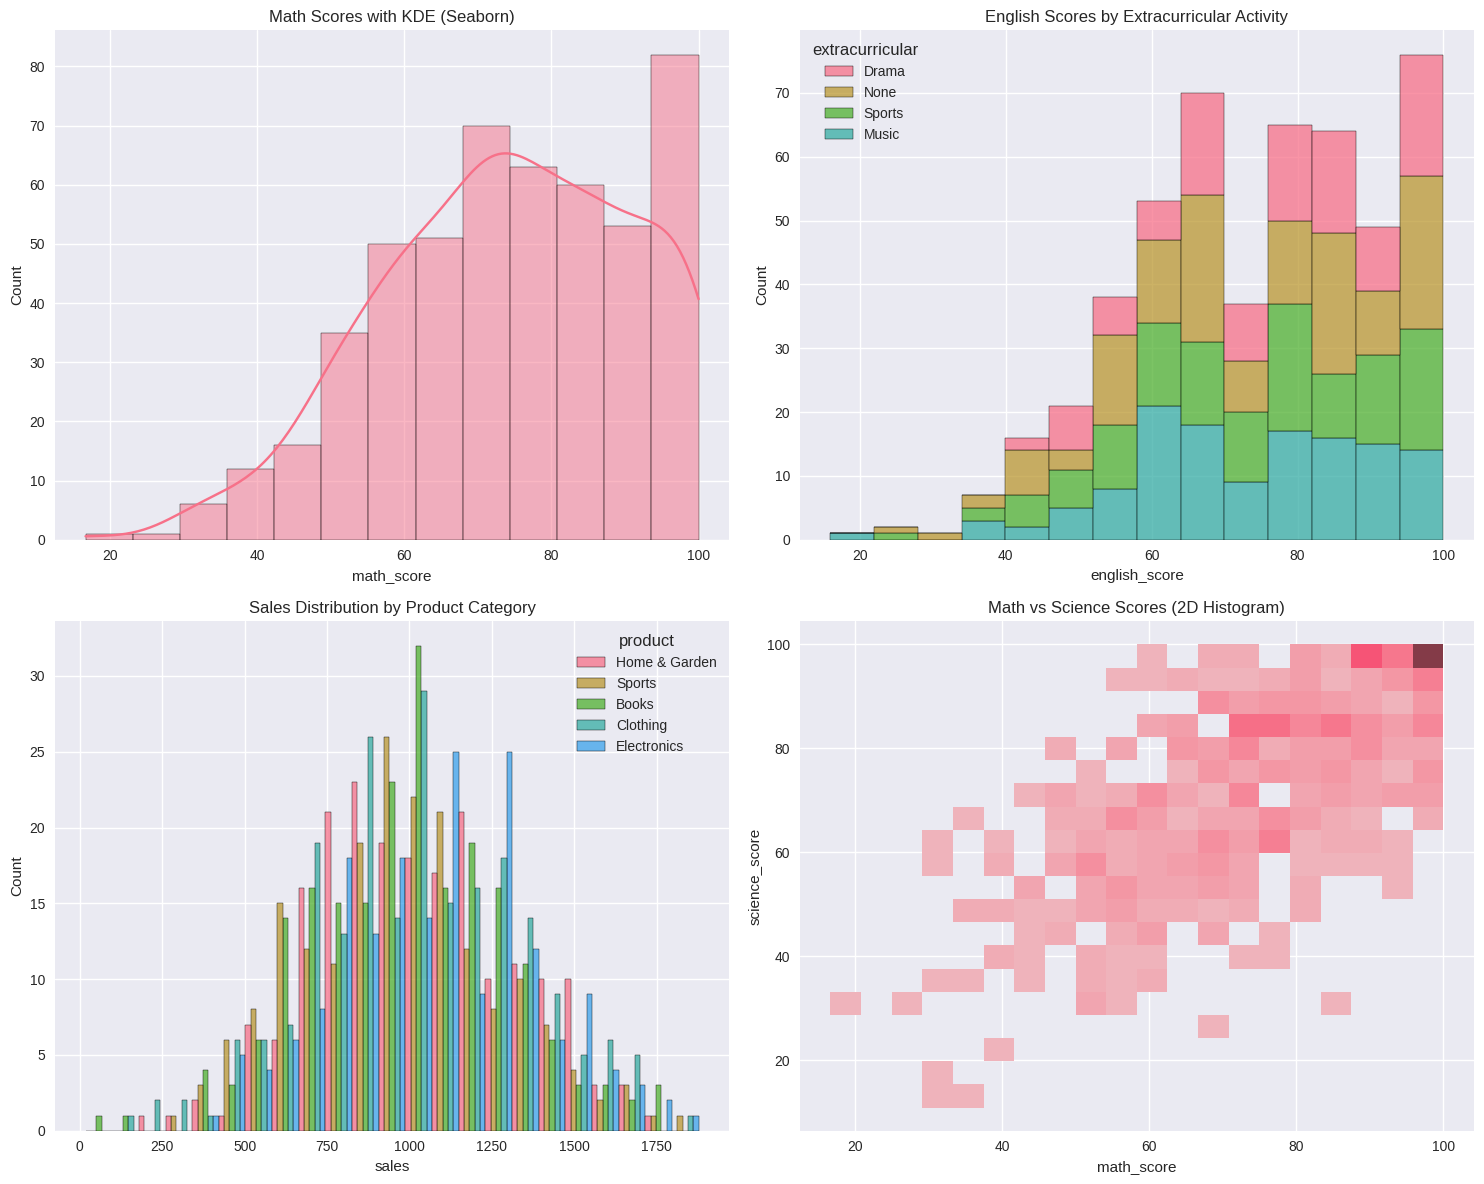

In [3]:
# Basic histogram with matplotlib
def create_histogram_matplotlib():
    """Create histogram using matplotlib"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Simple histogram
    axes[0, 0].hist(
        students_df["math_score"],
        bins=20,
        alpha=0.7,
        color="skyblue",
        edgecolor="black",
    )
    axes[0, 0].set_title("Math Scores Distribution")
    axes[0, 0].set_xlabel("Math Score")
    axes[0, 0].set_ylabel("Frequency")
    axes[0, 0].grid(True, alpha=0.3)

    # Histogram with density curve
    axes[0, 1].hist(
        students_df["study_hours"], bins=25, alpha=0.7, density=True, color="lightgreen"
    )
    # Add density curve
    x = np.linspace(
        students_df["study_hours"].min(), students_df["study_hours"].max(), 100
    )
    kde = stats.gaussian_kde(students_df["study_hours"].dropna())
    axes[0, 1].plot(x, kde(x), "r-", linewidth=2, label="Density Curve")
    axes[0, 1].set_title("Study Hours Distribution with KDE")
    axes[0, 1].set_xlabel("Study Hours per Week")
    axes[0, 1].set_ylabel("Density")
    axes[0, 1].legend()

    # Comparative histograms
    grade_10 = students_df[students_df["grade_level"] == "10th"]["math_score"]
    grade_12 = students_df[students_df["grade_level"] == "12th"]["math_score"]

    axes[1, 0].hist(
        [grade_10, grade_12],
        bins=20,
        alpha=0.7,
        label=["10th Grade", "12th Grade"],
        color=["orange", "purple"],
    )
    axes[1, 0].set_title("Math Scores by Grade Level")
    axes[1, 0].set_xlabel("Math Score")
    axes[1, 0].set_ylabel("Frequency")
    axes[1, 0].legend()

    # Sales distribution
    axes[1, 1].hist(sales_df["sales"], bins=30, alpha=0.7, color="coral")
    axes[1, 1].axvline(
        sales_df["sales"].mean(),
        color="red",
        linestyle="--",
        linewidth=2,
        label=f'Mean: {sales_df["sales"].mean():.0f}',
    )
    axes[1, 1].axvline(
        sales_df["sales"].median(),
        color="green",
        linestyle="--",
        linewidth=2,
        label=f'Median: {sales_df["sales"].median():.0f}',
    )
    axes[1, 1].set_title("Sales Distribution")
    axes[1, 1].set_xlabel("Sales Amount ($)")
    axes[1, 1].set_ylabel("Frequency")
    axes[1, 1].legend()

    plt.tight_layout()
    plt.show()


# Seaborn histogram
def create_histogram_seaborn():
    """Create histogram using seaborn"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Basic histogram with KDE
    sns.histplot(data=students_df, x="math_score", kde=True, ax=axes[0, 0])
    axes[0, 0].set_title("Math Scores with KDE (Seaborn)")

    # Histogram by category
    sns.histplot(
        data=students_df,
        x="english_score",
        hue="extracurricular",
        multiple="stack",
        ax=axes[0, 1],
    )
    axes[0, 1].set_title("English Scores by Extracurricular Activity")

    # Faceted histograms
    sns.histplot(
        data=sales_df, x="sales", hue="product", multiple="dodge", ax=axes[1, 0]
    )
    axes[1, 0].set_title("Sales Distribution by Product Category")

    # 2D histogram (hexbin style)
    sns.histplot(
        data=students_df, x="math_score", y="science_score", bins=20, ax=axes[1, 1]
    )
    axes[1, 1].set_title("Math vs Science Scores (2D Histogram)")

    plt.tight_layout()
    plt.show()


# Execute histogram examples
print("Creating Matplotlib Histograms...")
create_histogram_matplotlib()

print("Creating Seaborn Histograms...")
create_histogram_seaborn()

### 3.2 Box Plots

Creating Box Plots...


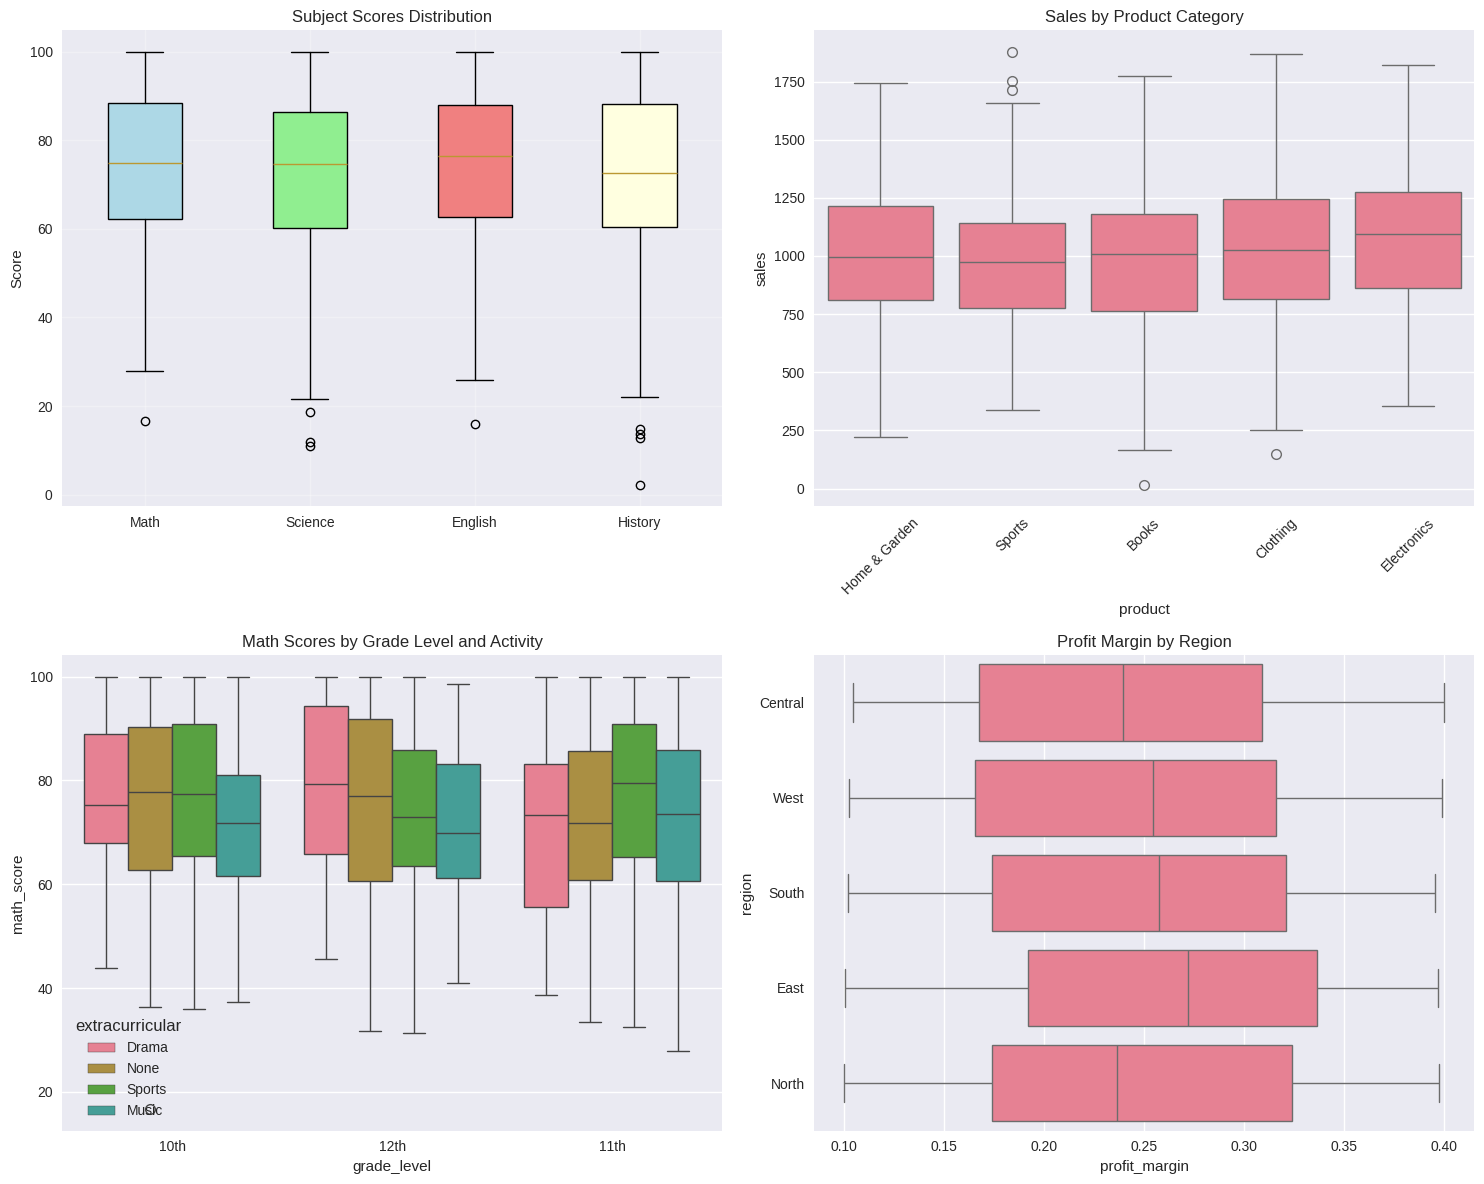

In [4]:
def create_box_plots():
    """Create various box plot examples"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Basic box plot
    box_data = [
        students_df["math_score"],
        students_df["science_score"],
        students_df["english_score"],
        students_df["history_score"],
    ]
    box_labels = ["Math", "Science", "English", "History"]

    bp1 = axes[0, 0].boxplot(box_data, labels=box_labels, patch_artist=True)
    colors = ["lightblue", "lightgreen", "lightcoral", "lightyellow"]
    for patch, color in zip(bp1["boxes"], colors):
        patch.set_facecolor(color)
    axes[0, 0].set_title("Subject Scores Distribution")
    axes[0, 0].set_ylabel("Score")
    axes[0, 0].grid(True, alpha=0.3)

    # Seaborn box plot with categories
    sns.boxplot(data=sales_df, x="product", y="sales", ax=axes[0, 1])
    axes[0, 1].set_title("Sales by Product Category")
    axes[0, 1].tick_params(axis="x", rotation=45)

    # Box plot with additional grouping
    sns.boxplot(
        data=students_df,
        x="grade_level",
        y="math_score",
        hue="extracurricular",
        ax=axes[1, 0],
    )
    axes[1, 0].set_title("Math Scores by Grade Level and Activity")

    # Horizontal box plot
    sns.boxplot(data=sales_df, y="region", x="profit_margin", ax=axes[1, 1])
    axes[1, 1].set_title("Profit Margin by Region")

    plt.tight_layout()
    plt.show()


print("Creating Box Plots...")
create_box_plots()

### 3.3 Violin Plots

Creating Violin Plots...


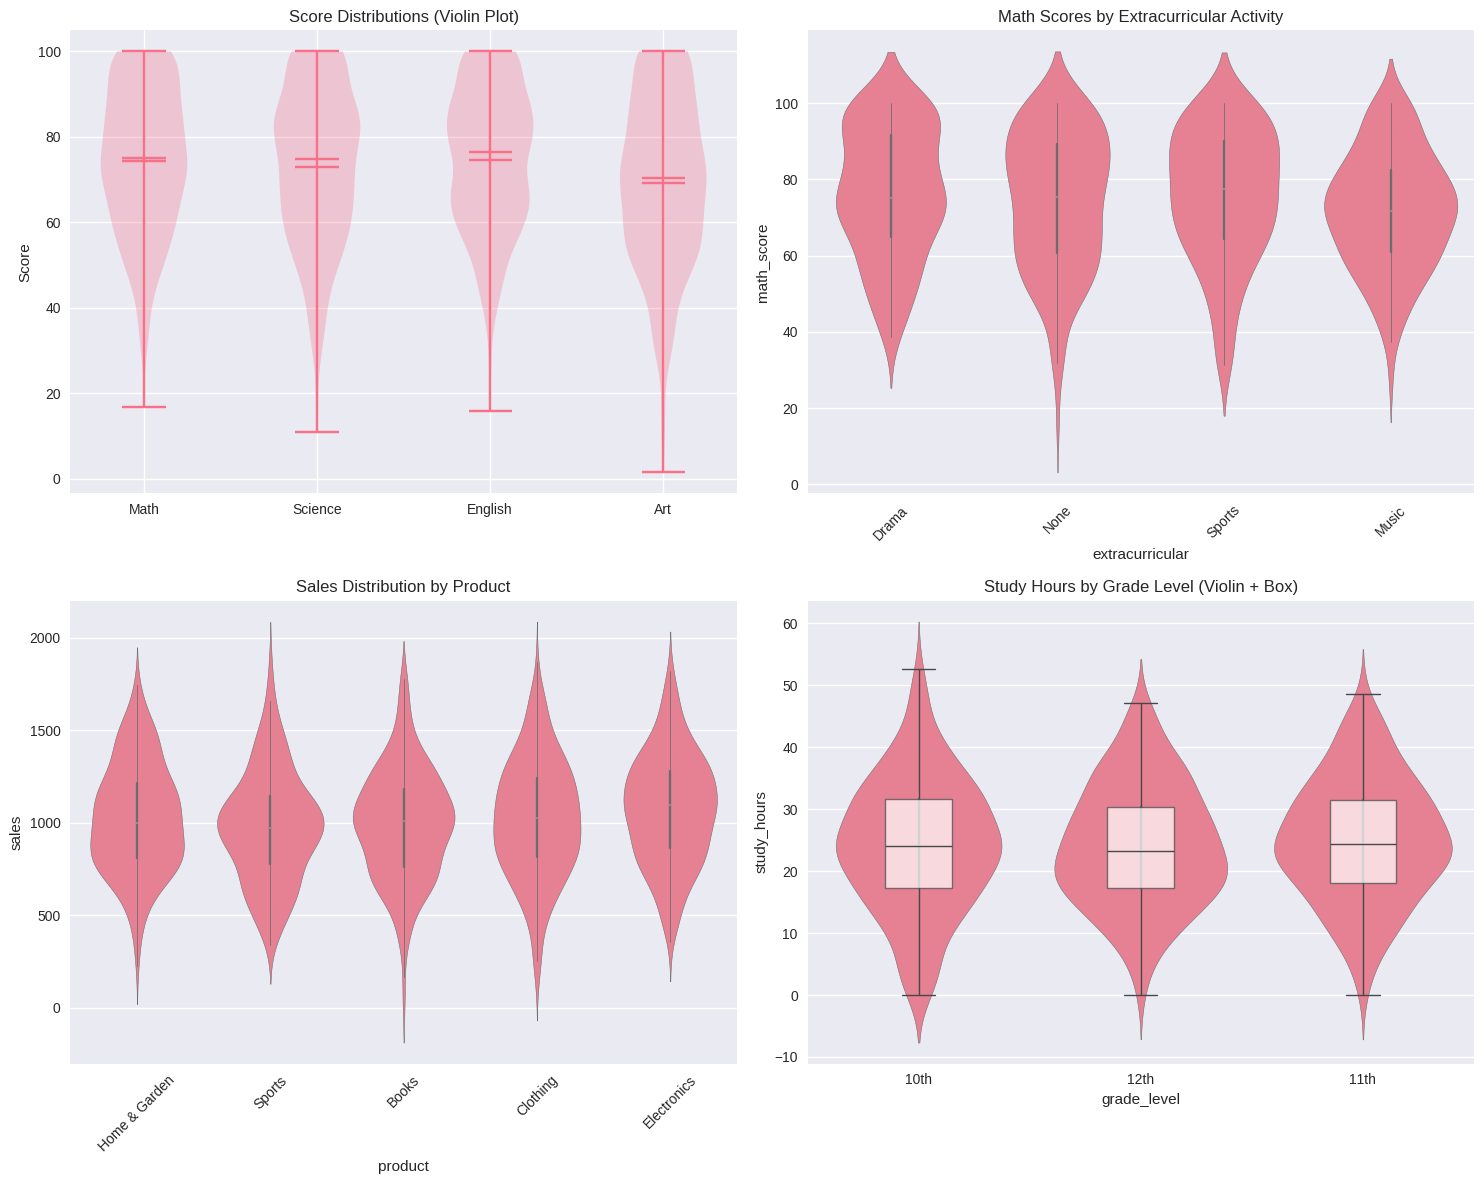

In [5]:
def create_violin_plots():
    """Create violin plot examples"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Basic violin plot
    data_for_violin = [
        students_df["math_score"],
        students_df["science_score"],
        students_df["english_score"],
        students_df["art_score"],
    ]

    parts = axes[0, 0].violinplot(
        data_for_violin, positions=[1, 2, 3, 4], showmeans=True, showmedians=True
    )
    axes[0, 0].set_xticks([1, 2, 3, 4])
    axes[0, 0].set_xticklabels(["Math", "Science", "English", "Art"])
    axes[0, 0].set_title("Score Distributions (Violin Plot)")
    axes[0, 0].set_ylabel("Score")

    # Seaborn violin plot
    sns.violinplot(data=students_df, x="extracurricular", y="math_score", ax=axes[0, 1])
    axes[0, 1].set_title("Math Scores by Extracurricular Activity")
    axes[0, 1].tick_params(axis="x", rotation=45)

    # Split violin plot
    sns.violinplot(data=sales_df, x="product", y="sales", ax=axes[1, 0])
    axes[1, 0].set_title("Sales Distribution by Product")
    axes[1, 0].tick_params(axis="x", rotation=45)

    # Violin plot with box plot overlay
    sns.violinplot(data=students_df, x="grade_level", y="study_hours", ax=axes[1, 1])
    sns.boxplot(
        data=students_df,
        x="grade_level",
        y="study_hours",
        ax=axes[1, 1],
        width=0.3,
        boxprops=dict(facecolor="white", alpha=0.7),
    )
    axes[1, 1].set_title("Study Hours by Grade Level (Violin + Box)")

    plt.tight_layout()
    plt.show()


print("Creating Violin Plots...")
create_violin_plots()

### 3.4 Density Plots (KDE)

Creating Density Plots...


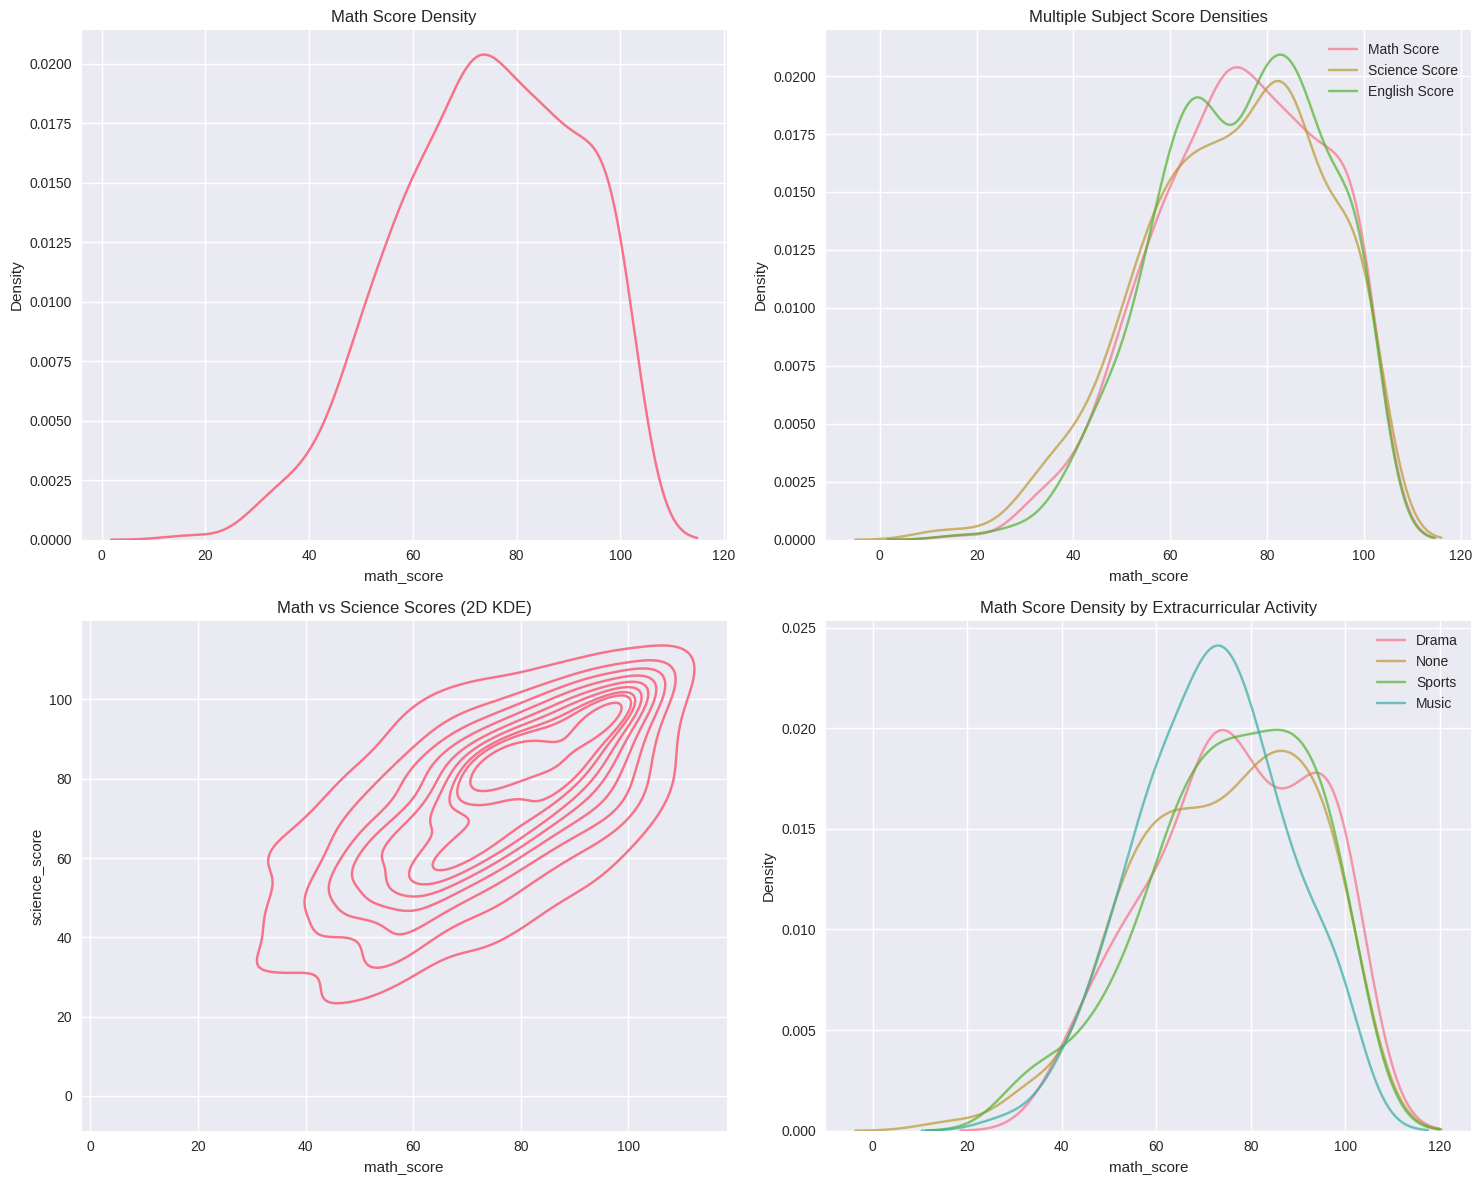

In [6]:
def create_density_plots():
    """Create KDE density plots"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Single variable KDE
    sns.kdeplot(data=students_df, x="math_score", ax=axes[0, 0])
    axes[0, 0].set_title("Math Score Density")

    # Multiple KDE plots
    for subject in ["math_score", "science_score", "english_score"]:
        sns.kdeplot(
            data=students_df,
            x=subject,
            ax=axes[0, 1],
            alpha=0.7,
            label=subject.replace("_", " ").title(),
        )
    axes[0, 1].set_title("Multiple Subject Score Densities")
    axes[0, 1].legend()

    # 2D KDE plot
    sns.kdeplot(data=students_df, x="math_score", y="science_score", ax=axes[1, 0])
    axes[1, 0].set_title("Math vs Science Scores (2D KDE)")

    # KDE by category
    for activity in students_df["extracurricular"].unique():
        if pd.notna(activity):
            subset = students_df[students_df["extracurricular"] == activity]
            sns.kdeplot(
                data=subset, x="math_score", ax=axes[1, 1], label=activity, alpha=0.7
            )
    axes[1, 1].set_title("Math Score Density by Extracurricular Activity")
    axes[1, 1].legend()

    plt.tight_layout()
    plt.show()


print("Creating Density Plots...")
create_density_plots()

---

## 4. Comparison Charts {#comparison-charts}

### 4.1 Bar Charts

Creating Bar Charts...


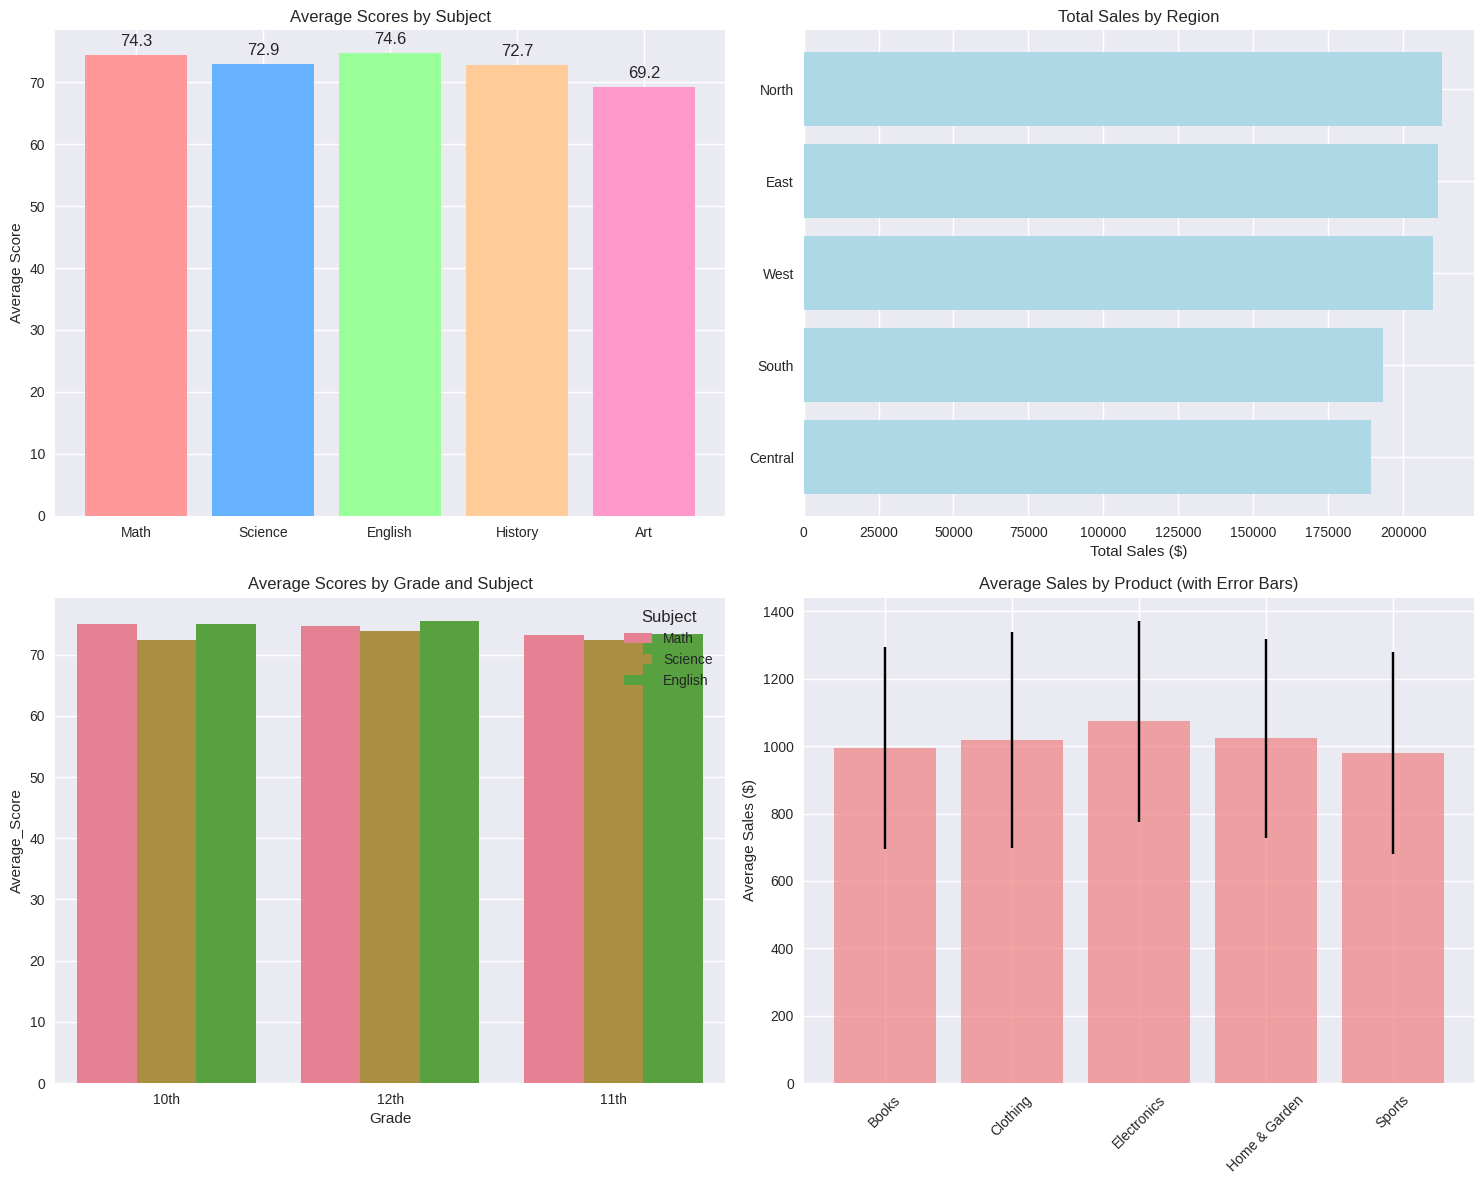

In [7]:
def create_bar_charts():
    """Create various bar chart examples"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Simple bar chart - average scores by subject
    subjects = ["Math", "Science", "English", "History", "Art"]
    avg_scores = [
        students_df["math_score"].mean(),
        students_df["science_score"].mean(),
        students_df["english_score"].mean(),
        students_df["history_score"].mean(),
        students_df["art_score"].mean(),
    ]

    bars1 = axes[0, 0].bar(
        subjects,
        avg_scores,
        color=["#FF9999", "#66B2FF", "#99FF99", "#FFCC99", "#FF99CC"],
    )
    axes[0, 0].set_title("Average Scores by Subject")
    axes[0, 0].set_ylabel("Average Score")

    # Add value labels on bars
    for bar, score in zip(bars1, avg_scores):
        axes[0, 0].text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 1,
            f"{score:.1f}",
            ha="center",
            va="bottom",
        )

    # Horizontal bar chart - sales by region
    region_sales = sales_df.groupby("region")["sales"].sum().sort_values()
    axes[0, 1].barh(region_sales.index, region_sales.values, color="lightblue")
    axes[0, 1].set_title("Total Sales by Region")
    axes[0, 1].set_xlabel("Total Sales ($)")

    # Grouped bar chart using seaborn
    grade_subject_data = []
    for grade in students_df["grade_level"].unique():
        grade_data = students_df[students_df["grade_level"] == grade]
        for subject in ["math_score", "science_score", "english_score"]:
            grade_subject_data.append(
                {
                    "Grade": grade,
                    "Subject": subject.replace("_score", "").title(),
                    "Average_Score": grade_data[subject].mean(),
                }
            )

    grade_df = pd.DataFrame(grade_subject_data)
    sns.barplot(
        data=grade_df, x="Grade", y="Average_Score", hue="Subject", ax=axes[1, 0]
    )
    axes[1, 0].set_title("Average Scores by Grade and Subject")

    # Bar chart with error bars
    product_stats = sales_df.groupby("product").agg({"sales": ["mean", "std"]}).round(2)
    product_stats.columns = ["mean", "std"]

    axes[1, 1].bar(
        product_stats.index,
        product_stats["mean"],
        yerr=product_stats["std"],
        capsize=5,
        color="lightcoral",
        alpha=0.7,
    )
    axes[1, 1].set_title("Average Sales by Product (with Error Bars)")
    axes[1, 1].set_ylabel("Average Sales ($)")
    axes[1, 1].tick_params(axis="x", rotation=45)

    plt.tight_layout()
    plt.show()


print("Creating Bar Charts...")
create_bar_charts()

### 4.2 Stacked Bar Charts

Creating Stacked Bar Charts...


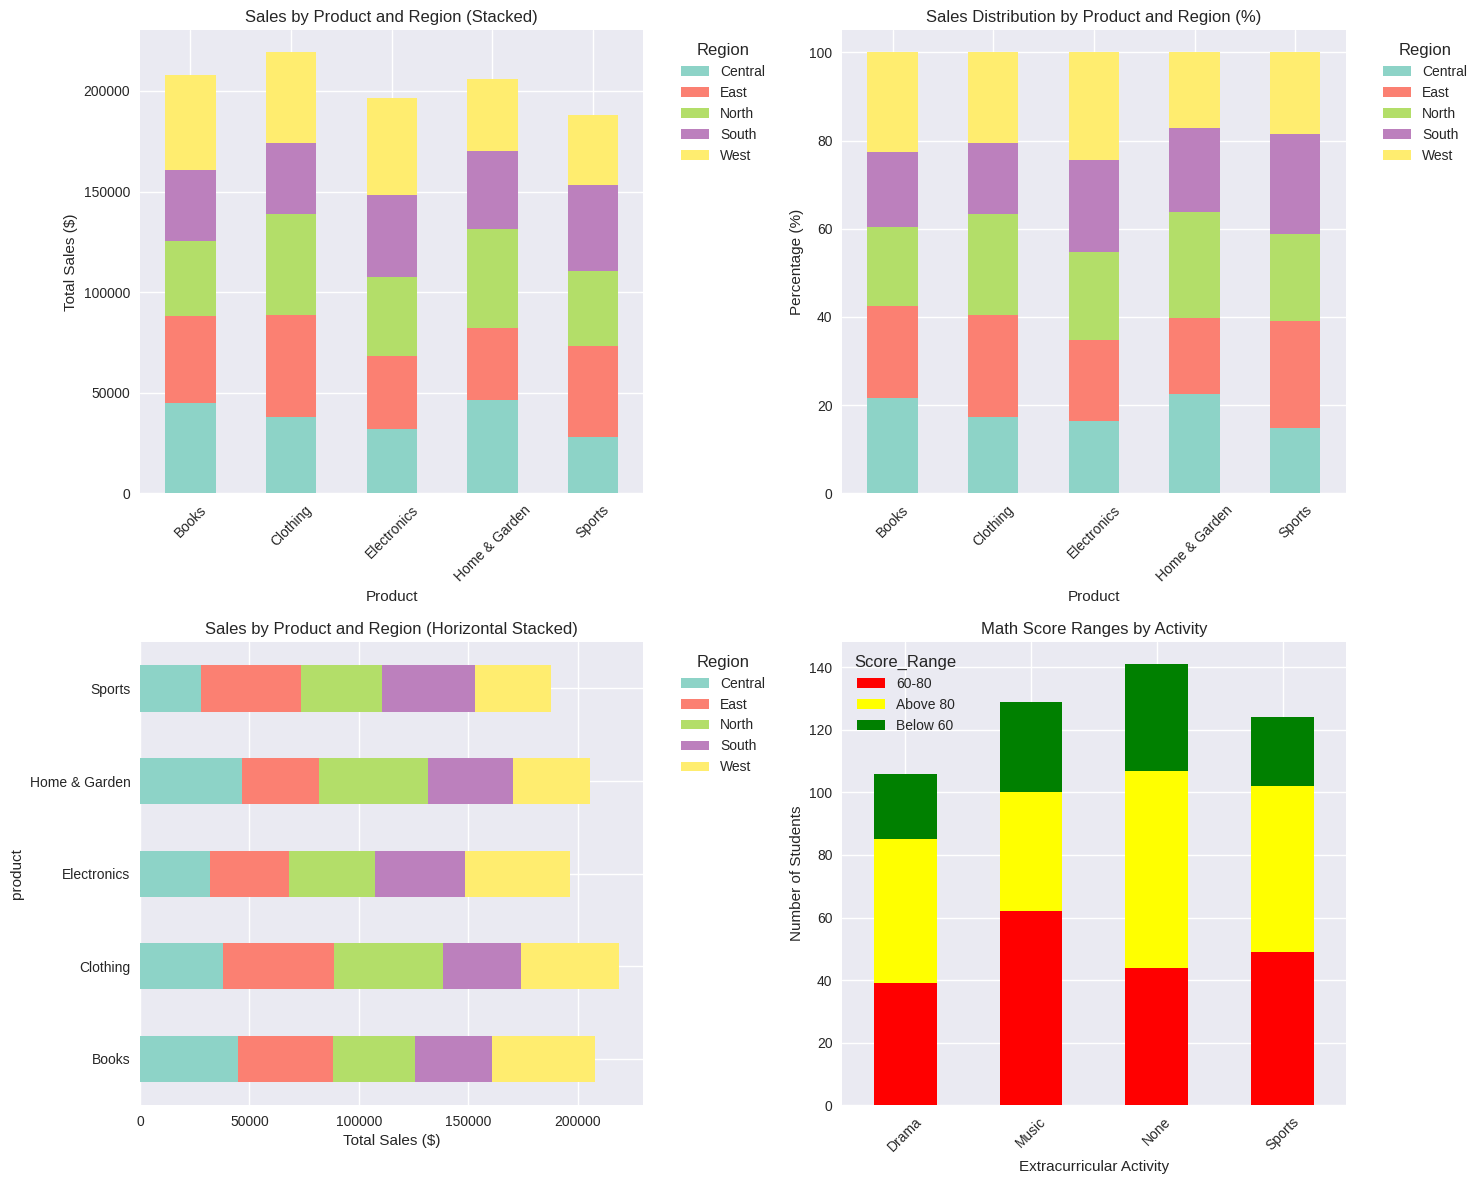

In [8]:
def create_stacked_bar_charts():
    """Create stacked bar chart examples"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Create data for stacked bars - sales by product and region
    pivot_data = (
        sales_df.groupby(["product", "region"])["sales"].sum().unstack(fill_value=0)
    )

    # Stacked bar chart
    pivot_data.plot(kind="bar", stacked=True, ax=axes[0, 0], colormap="Set3")
    axes[0, 0].set_title("Sales by Product and Region (Stacked)")
    axes[0, 0].set_xlabel("Product")
    axes[0, 0].set_ylabel("Total Sales ($)")
    axes[0, 0].legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
    axes[0, 0].tick_params(axis="x", rotation=45)

    # Percentage stacked bar
    pivot_data_pct = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100
    pivot_data_pct.plot(kind="bar", stacked=True, ax=axes[0, 1], colormap="Set3")
    axes[0, 1].set_title("Sales Distribution by Product and Region (%)")
    axes[0, 1].set_xlabel("Product")
    axes[0, 1].set_ylabel("Percentage (%)")
    axes[0, 1].legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
    axes[0, 1].tick_params(axis="x", rotation=45)

    # Horizontal stacked bar
    pivot_data.plot(kind="barh", stacked=True, ax=axes[1, 0], colormap="Set3")
    axes[1, 0].set_title("Sales by Product and Region (Horizontal Stacked)")
    axes[1, 0].set_xlabel("Total Sales ($)")
    axes[1, 0].legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")

    # Student performance stacked by activity
    student_activity_scores = []
    for activity in students_df["extracurricular"].unique():
        if pd.notna(activity):
            activity_data = students_df[students_df["extracurricular"] == activity]
            # Create score ranges
            math_ranges = pd.cut(
                activity_data["math_score"],
                bins=[0, 60, 80, 100],
                labels=["Below 60", "60-80", "Above 80"],
            )
            range_counts = math_ranges.value_counts()
            for range_name, count in range_counts.items():
                student_activity_scores.append(
                    {"Activity": activity, "Score_Range": range_name, "Count": count}
                )

    activity_df = pd.DataFrame(student_activity_scores)
    activity_pivot = activity_df.pivot(
        index="Activity", columns="Score_Range", values="Count"
    ).fillna(0)

    activity_pivot.plot(
        kind="bar", stacked=True, ax=axes[1, 1], color=["red", "yellow", "green"]
    )
    axes[1, 1].set_title("Math Score Ranges by Activity")
    axes[1, 1].set_xlabel("Extracurricular Activity")
    axes[1, 1].set_ylabel("Number of Students")
    axes[1, 1].tick_params(axis="x", rotation=45)

    plt.tight_layout()
    plt.show()


print("Creating Stacked Bar Charts...")
create_stacked_bar_charts()


---

## 5. Relationship Charts {#relationship-charts}

### 5.1 Scatter Plots


Creating Scatter Plots...


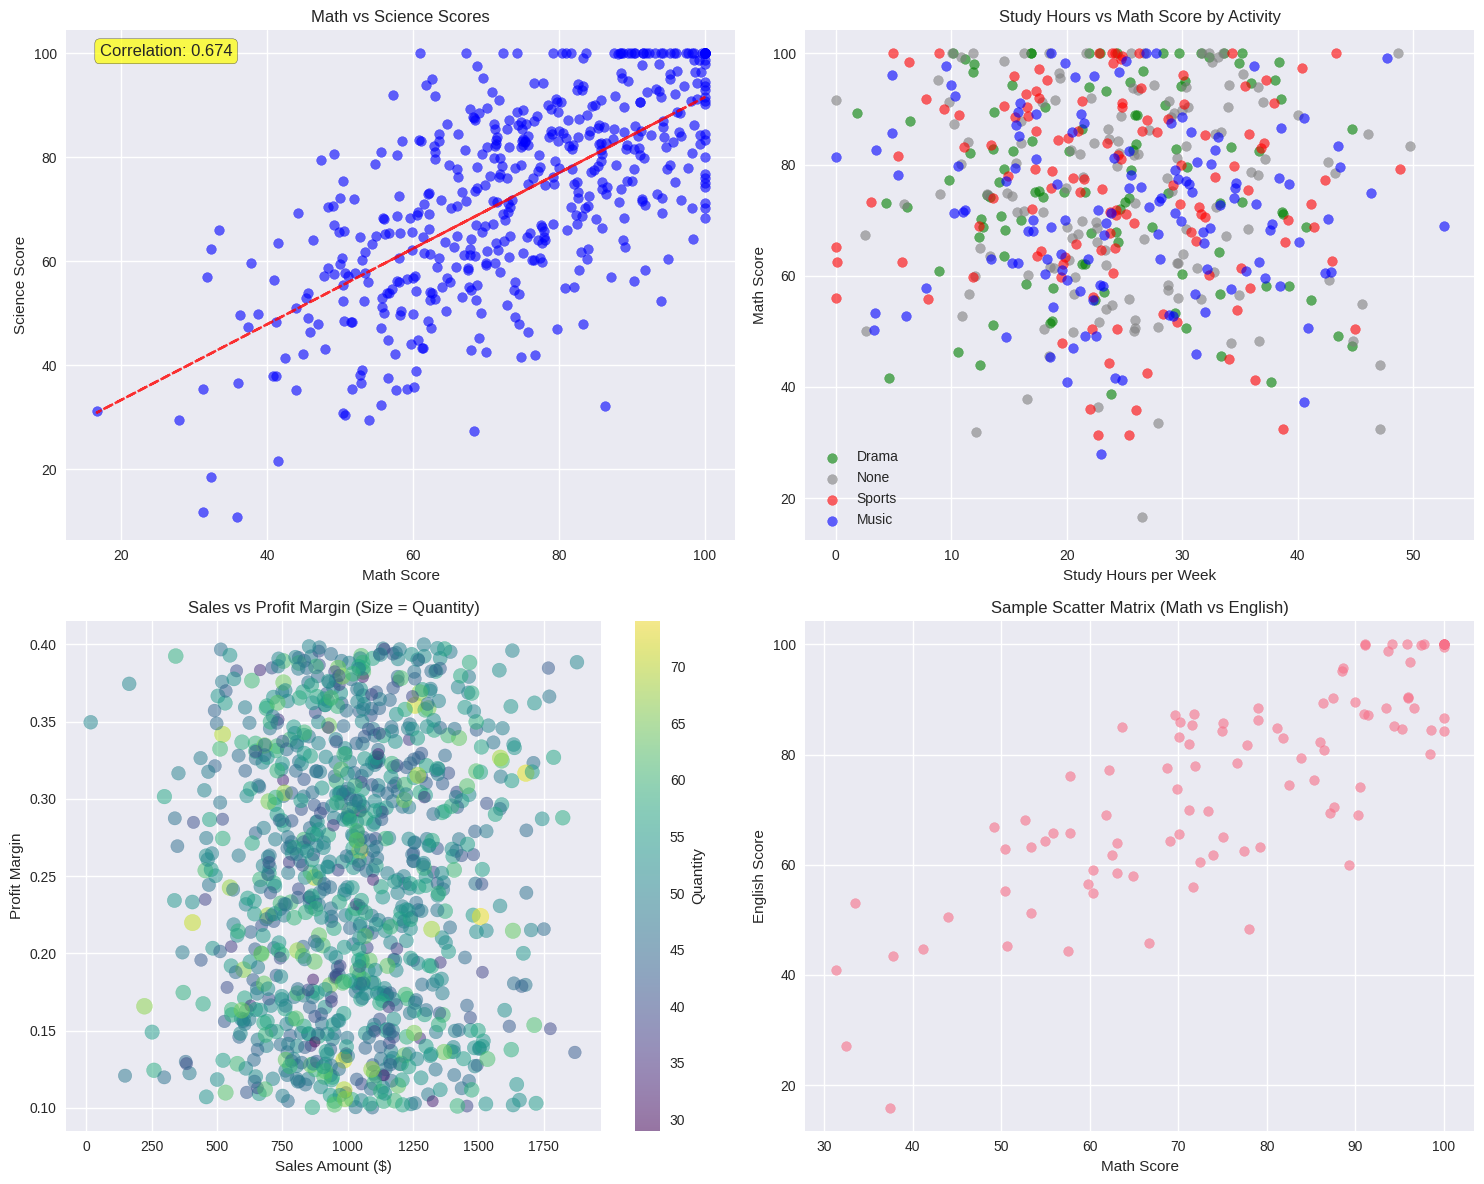

In [9]:
def create_scatter_plots():
    """Create various scatter plot examples"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Basic scatter plot
    axes[0, 0].scatter(
        students_df["math_score"], students_df["science_score"], alpha=0.6, color="blue"
    )
    axes[0, 0].set_xlabel("Math Score")
    axes[0, 0].set_ylabel("Science Score")
    axes[0, 0].set_title("Math vs Science Scores")

    # Add trend line
    z = np.polyfit(students_df["math_score"], students_df["science_score"], 1)
    p = np.poly1d(z)
    axes[0, 0].plot(
        students_df["math_score"], p(students_df["math_score"]), "r--", alpha=0.8
    )

    # Calculate correlation
    correlation = students_df["math_score"].corr(students_df["science_score"])
    axes[0, 0].text(
        0.05,
        0.95,
        f"Correlation: {correlation:.3f}",
        transform=axes[0, 0].transAxes,
        bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7),
    )

    # Colored scatter plot by category
    colors = {"Sports": "red", "Music": "blue", "Drama": "green", "None": "gray"}
    for activity in students_df["extracurricular"].unique():
        if pd.notna(activity):
            subset = students_df[students_df["extracurricular"] == activity]
            axes[0, 1].scatter(
                subset["study_hours"],
                subset["math_score"],
                label=activity,
                color=colors.get(activity, "black"),
                alpha=0.6,
            )

    axes[0, 1].set_xlabel("Study Hours per Week")
    axes[0, 1].set_ylabel("Math Score")
    axes[0, 1].set_title("Study Hours vs Math Score by Activity")
    axes[0, 1].legend()

    # Sized scatter plot (bubble chart)
    axes[1, 0].scatter(
        sales_df["sales"],
        sales_df["profit_margin"],
        s=sales_df["quantity"] * 2,
        alpha=0.5,
        c=sales_df["quantity"],
        cmap="viridis",
    )
    axes[1, 0].set_xlabel("Sales Amount ($)")
    axes[1, 0].set_ylabel("Profit Margin")
    axes[1, 0].set_title("Sales vs Profit Margin (Size = Quantity)")
    cbar = plt.colorbar(axes[1, 0].collections[0], ax=axes[1, 0])
    cbar.set_label("Quantity")

    # Matrix scatter plot using seaborn
    numeric_cols = ["math_score", "science_score", "english_score", "study_hours"]
    sample_students = students_df[numeric_cols].sample(
        100
    )  # Sample for cleaner visualization

    # Create a mini scatter plot matrix
    for i, col1 in enumerate(numeric_cols[:2]):
        for j, col2 in enumerate(numeric_cols[2:]):
            if i == 0 and j == 0:
                axes[1, 1].scatter(
                    sample_students[col1], sample_students[col2], alpha=0.6
                )
                axes[1, 1].set_xlabel(col1.replace("_", " ").title())
                axes[1, 1].set_ylabel(col2.replace("_", " ").title())
                axes[1, 1].set_title("Sample Scatter Matrix (Math vs English)")

    plt.tight_layout()
    plt.show()


print("Creating Scatter Plots...")
create_scatter_plots()

### 5.2 Line Charts


Creating Line Charts...


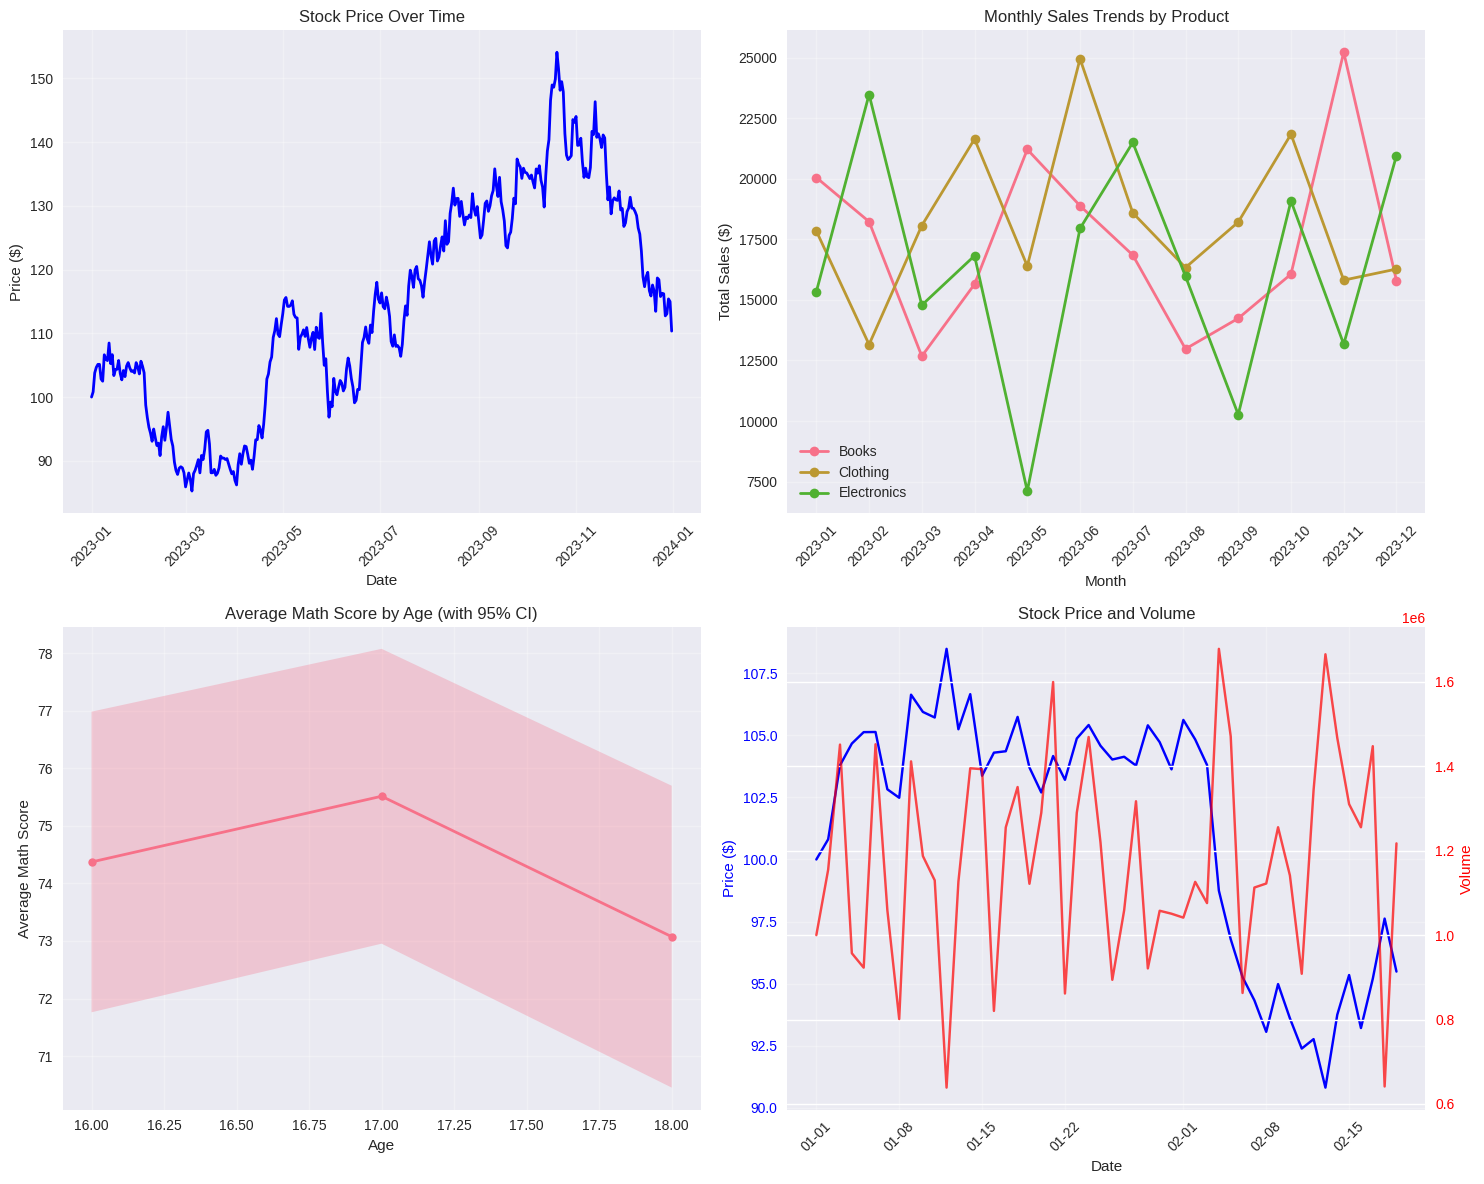

In [10]:
def create_line_charts():
    """Create various line chart examples"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Time series line chart - stock price
    axes[0, 0].plot(stock_df["date"], stock_df["price"], linewidth=2, color="blue")
    axes[0, 0].set_title("Stock Price Over Time")
    axes[0, 0].set_xlabel("Date")
    axes[0, 0].set_ylabel("Price ($)")
    axes[0, 0].grid(True, alpha=0.3)

    # Format x-axis dates
    axes[0, 0].xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
    axes[0, 0].xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    plt.setp(axes[0, 0].xaxis.get_majorticklabels(), rotation=45)

    # Multiple line series
    # Create monthly sales trends
    sales_df["month"] = pd.to_datetime(sales_df["date"]).dt.to_period("M")
    monthly_sales = (
        sales_df.groupby(["month", "product"])["sales"].sum().unstack(fill_value=0)
    )

    for product in monthly_sales.columns[:3]:  # Show only first 3 products for clarity
        axes[0, 1].plot(
            monthly_sales.index.astype(str),
            monthly_sales[product],
            marker="o",
            linewidth=2,
            label=product,
        )

    axes[0, 1].set_title("Monthly Sales Trends by Product")
    axes[0, 1].set_xlabel("Month")
    axes[0, 1].set_ylabel("Total Sales ($)")
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].tick_params(axis="x", rotation=45)

    # Line chart with confidence interval
    # Create average score trends by age
    age_scores = students_df.groupby("age").agg(
        {"math_score": ["mean", "std", "count"]}
    )
    age_scores.columns = ["mean", "std", "count"]

    # Calculate confidence intervals
    confidence_interval = 1.96 * age_scores["std"] / np.sqrt(age_scores["count"])

    axes[1, 0].plot(
        age_scores.index, age_scores["mean"], "o-", linewidth=2, markersize=6
    )
    axes[1, 0].fill_between(
        age_scores.index,
        age_scores["mean"] - confidence_interval,
        age_scores["mean"] + confidence_interval,
        alpha=0.3,
    )
    axes[1, 0].set_title("Average Math Score by Age (with 95% CI)")
    axes[1, 0].set_xlabel("Age")
    axes[1, 0].set_ylabel("Average Math Score")
    axes[1, 0].grid(True, alpha=0.3)

    # Dual-axis line chart
    ax2 = axes[1, 1].twinx()

    # Plot price on left axis
    line1 = axes[1, 1].plot(
        stock_df["date"][:50], stock_df["price"][:50], "b-", label="Price"
    )
    axes[1, 1].set_xlabel("Date")
    axes[1, 1].set_ylabel("Price ($)", color="blue")
    axes[1, 1].tick_params(axis="y", labelcolor="blue")

    # Plot volume on right axis
    line2 = ax2.plot(
        stock_df["date"][:50], stock_df["volume"][:50], "r-", alpha=0.7, label="Volume"
    )
    ax2.set_ylabel("Volume", color="red")
    ax2.tick_params(axis="y", labelcolor="red")

    axes[1, 1].set_title("Stock Price and Volume")
    axes[1, 1].grid(True, alpha=0.3)

    # Format dates
    axes[1, 1].xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
    plt.setp(axes[1, 1].xaxis.get_majorticklabels(), rotation=45)

    plt.tight_layout()
    plt.show()


print("Creating Line Charts...")
create_line_charts()

### 5.3 Correlation Heatmaps

Creating Correlation Heatmaps...


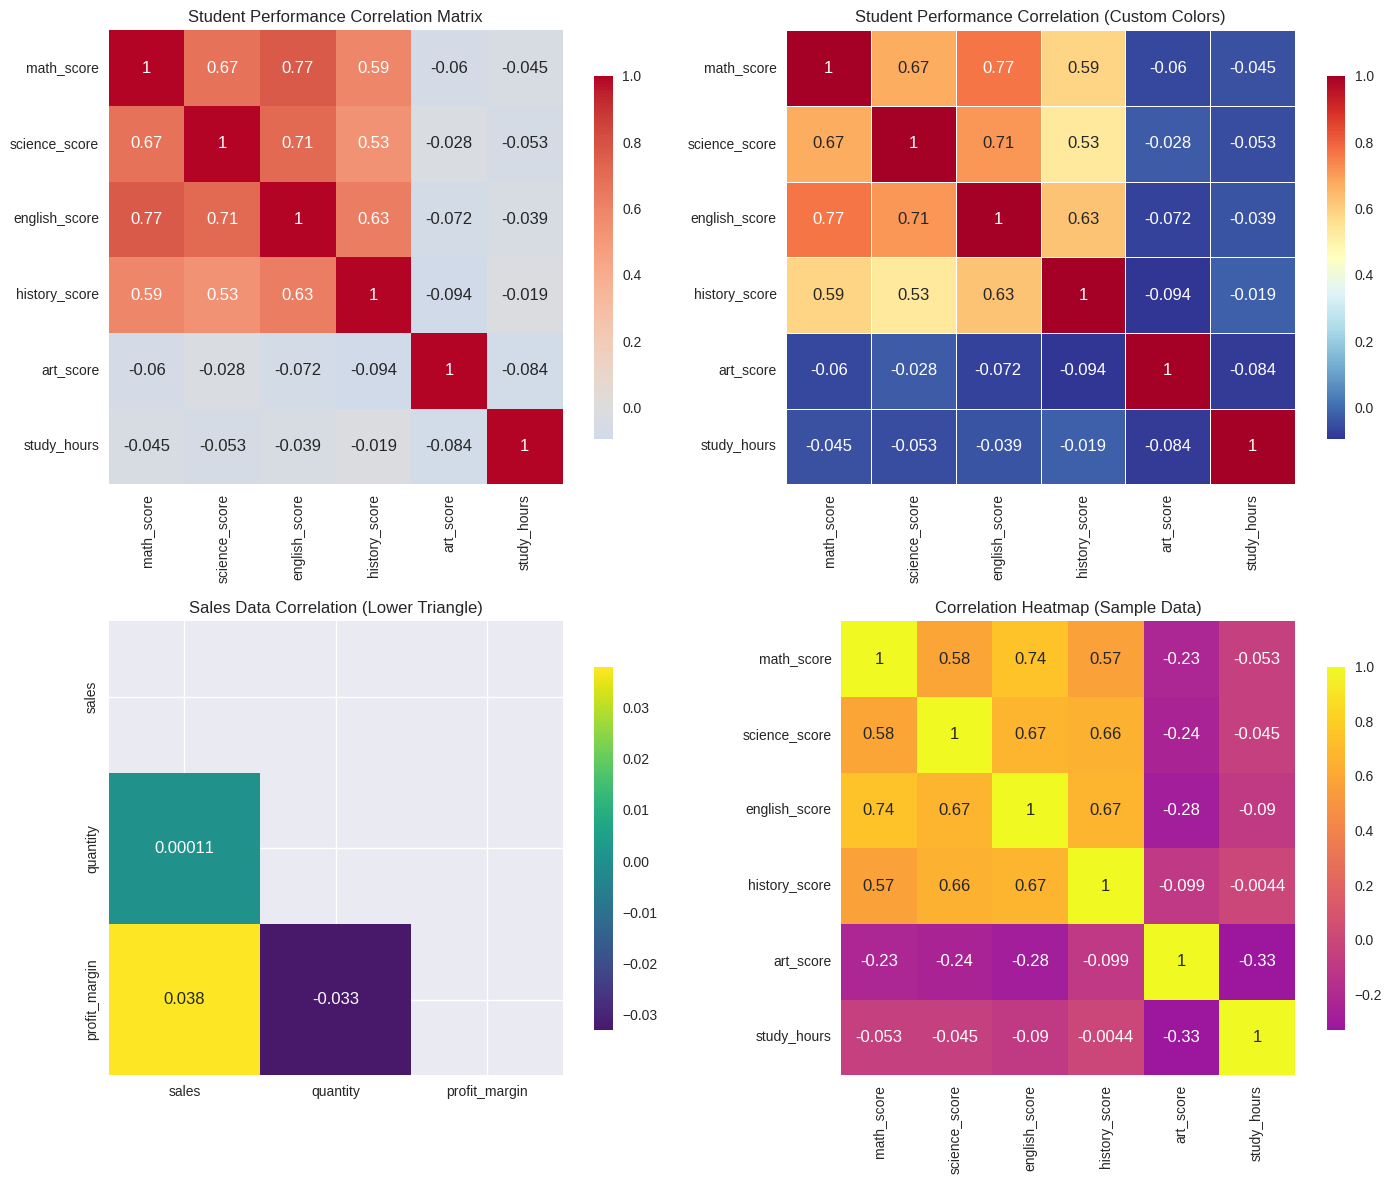

In [11]:
def create_correlation_heatmaps():
    """Create correlation heatmap examples"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Basic correlation heatmap for student scores
    score_cols = [
        "math_score",
        "science_score",
        "english_score",
        "history_score",
        "art_score",
        "study_hours",
    ]
    correlation_matrix = students_df[score_cols].corr()

    sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap="coolwarm",
        center=0,
        square=True,
        ax=axes[0, 0],
        cbar_kws={"shrink": 0.8},
    )
    axes[0, 0].set_title("Student Performance Correlation Matrix")

    # Heatmap with custom colormap
    sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap="RdYlBu_r",
        linewidths=0.5,
        ax=axes[0, 1],
        cbar_kws={"shrink": 0.8},
    )
    axes[0, 1].set_title("Student Performance Correlation (Custom Colors)")

    # Sales data correlation
    sales_numeric = sales_df.select_dtypes(include=[np.number])
    sales_corr = sales_numeric.corr()

    # Mask for upper triangle
    mask = np.triu(np.ones_like(sales_corr, dtype=bool))
    sns.heatmap(
        sales_corr,
        mask=mask,
        annot=True,
        cmap="viridis",
        center=0,
        square=True,
        ax=axes[1, 0],
        cbar_kws={"shrink": 0.8},
    )
    axes[1, 0].set_title("Sales Data Correlation (Lower Triangle)")

    # Clustermap (hierarchically clustered heatmap)
    # Create a subset for cleaner visualization
    student_subset = students_df[score_cols].sample(50)
    correlation_subset = student_subset.corr()

    sns.heatmap(
        correlation_subset,
        annot=True,
        cmap="plasma",
        center=0,
        square=True,
        ax=axes[1, 1],
        cbar_kws={"shrink": 0.8},
    )
    axes[1, 1].set_title("Correlation Heatmap (Sample Data)")

    plt.tight_layout()
    plt.show()


print("Creating Correlation Heatmaps...")
create_correlation_heatmaps()

---

## 6. Composition Charts {#composition-charts}

### 6.1 Pie Charts

Creating Pie Charts...


TypeError: Axes.pie() got an unexpected keyword argument 'alpha'

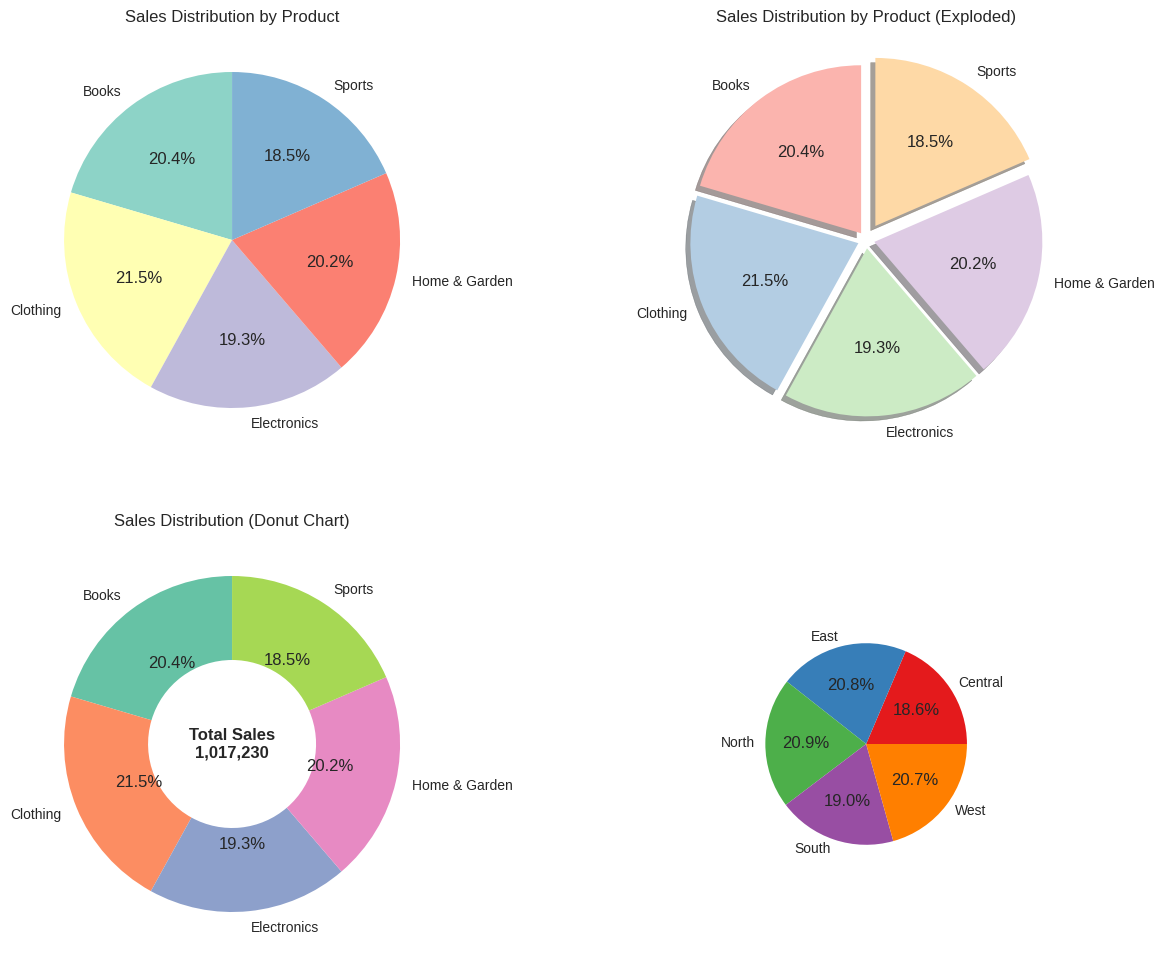

In [17]:
def create_pie_charts():
    """Create various pie chart examples"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Basic pie chart - product sales distribution
    product_sales = sales_df.groupby('product')['sales'].sum()
    
    axes[0,0].pie(product_sales.values, labels=product_sales.index, autopct='%1.1f%%', 
                 startangle=90, colors=plt.cm.Set3.colors)
    axes[0,0].set_title('Sales Distribution by Product')
    
    # Exploded pie chart
    explode = (0.05, 0.05, 0.05, 0.05, 0.1)  # Explode the last slice
    axes[0,1].pie(product_sales.values, labels=product_sales.index, autopct='%1.1f%%',
                 explode=explode, shadow=True, startangle=90, colors=plt.cm.Pastel1.colors)
    axes[0,1].set_title('Sales Distribution by Product (Exploded)')
    
    # Donut chart (pie chart with hole)
    wedges, texts, autotexts = axes[1,0].pie(product_sales.values, labels=product_sales.index, 
                                           autopct='%1.1f%%', startangle=90,
                                           colors=plt.cm.Set2.colors, wedgeprops=dict(width=0.5))
    
    # Add center text
    axes[1,0].text(0, 0, f'Total Sales\n{product_sales.sum():,.0f}', 
                  ha='center', va='center', fontsize=12, weight='bold')
    axes[1,0].set_title('Sales Distribution (Donut Chart)')
    
    # Nested pie chart (two levels)
    # Outer ring: regions, inner ring: top products in each region
    region_sales = sales_df.groupby('region')['sales'].sum()
    
    # Create inner pie
    axes[1,1].pie(region_sales.values, labels=region_sales.index, autopct='%1.1f%%',
                 radius=0.6, colors=plt.cm.Set1.colors)
    
    # Create outer ring for top product in each region
    region_product = sales_df.groupby(['region', 'product'])['sales'].sum().reset_index()
    top_products = region_product.loc[region_product.groupby('region')['sales'].idxmax()]
    
    axes[1,1].pie(top_products['sales'], labels=top_products['product'], 
                 radius=1.0, wedgeprops=dict(width=0.4), alpha=0.7, colors=plt.cm.Pastel2.colors)
    axes[1,1].set_title('Sales by Region (Inner) and Top Product (Outer)')
    
    plt.tight_layout()
    plt.show()

print("Creating Pie Charts...")
create_pie_charts()

### 6.2 Treemaps


Creating Treemaps...


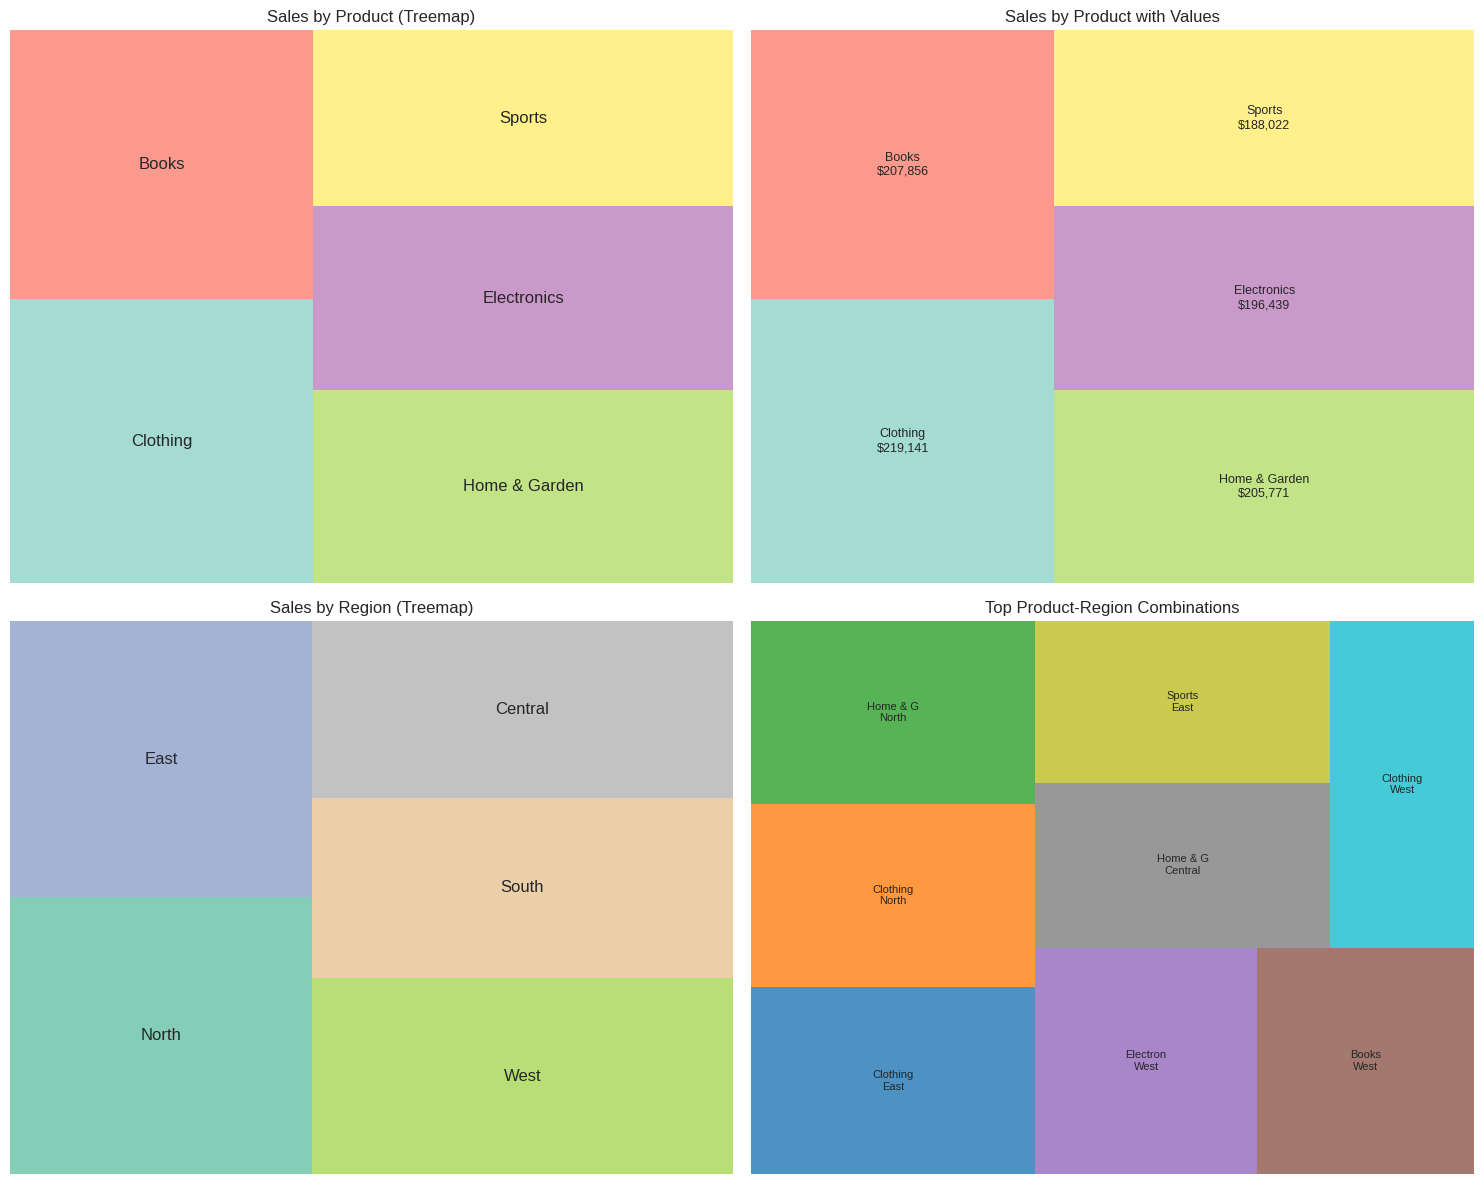

In [18]:
def create_treemaps():
    """Create treemap examples"""
    try:
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))

        # Basic treemap - sales by product
        product_sales = (
            sales_df.groupby("product")["sales"].sum().sort_values(ascending=False)
        )

        # Create colors
        colors = plt.cm.Set3(np.linspace(0, 1, len(product_sales)))

        squarify.plot(
            sizes=product_sales.values,
            label=product_sales.index,
            color=colors,
            alpha=0.8,
            ax=axes[0, 0],
        )
        axes[0, 0].set_title("Sales by Product (Treemap)")
        axes[0, 0].axis("off")

        # Treemap with values
        labels = [f"{prod}\n${val:,.0f}" for prod, val in product_sales.items()]
        squarify.plot(
            sizes=product_sales.values,
            label=labels,
            color=colors,
            alpha=0.8,
            ax=axes[0, 1],
            text_kwargs={"fontsize": 9},
        )
        axes[0, 1].set_title("Sales by Product with Values")
        axes[0, 1].axis("off")

        # Regional sales treemap
        region_sales = (
            sales_df.groupby("region")["sales"].sum().sort_values(ascending=False)
        )
        region_colors = plt.cm.Set2(np.linspace(0, 1, len(region_sales)))

        squarify.plot(
            sizes=region_sales.values,
            label=region_sales.index,
            color=region_colors,
            alpha=0.8,
            ax=axes[1, 0],
        )
        axes[1, 0].set_title("Sales by Region (Treemap)")
        axes[1, 0].axis("off")

        # Hierarchical treemap simulation (product categories with subcategories)
        # Create sample hierarchical data
        hierarchical_data = []
        for product in product_sales.index:
            product_data = sales_df[sales_df["product"] == product]
            region_breakdown = product_data.groupby("region")["sales"].sum()
            for region, sales in region_breakdown.items():
                hierarchical_data.append(
                    {"Product": product, "Region": region, "Sales": sales}
                )

        hier_df = pd.DataFrame(hierarchical_data)
        top_combinations = hier_df.nlargest(8, "Sales")  # Top 8 for visibility

        combo_labels = [
            f'{row["Product"][:8]}\n{row["Region"]}'
            for _, row in top_combinations.iterrows()
        ]
        squarify.plot(
            sizes=top_combinations["Sales"],
            label=combo_labels,
            color=plt.cm.tab10(np.linspace(0, 1, len(top_combinations))),
            alpha=0.8,
            ax=axes[1, 1],
            text_kwargs={"fontsize": 8},
        )
        axes[1, 1].set_title("Top Product-Region Combinations")
        axes[1, 1].axis("off")

        plt.tight_layout()
        plt.show()

    except ImportError:
        print("Squarify not available. Installing: pip install squarify")
        # Alternative using matplotlib patches
        fig, ax = plt.subplots(figsize=(10, 6))

        # Create simple rectangular representation
        product_sales = (
            sales_df.groupby("product")["sales"].sum().sort_values(ascending=False)
        )

        # Calculate rectangle positions and sizes
        total = product_sales.sum()
        widths = product_sales / total

        left = 0
        colors = plt.cm.Set3(np.linspace(0, 1, len(product_sales)))

        for i, (product, sales) in enumerate(product_sales.items()):
            width = widths.iloc[i]
            rect = plt.Rectangle(
                (left, 0), width, 1, facecolor=colors[i], alpha=0.8, edgecolor="white"
            )
            ax.add_patch(rect)

            # Add label
            ax.text(
                left + width / 2,
                0.5,
                f"{product}\n${sales:,.0f}",
                ha="center",
                va="center",
                fontsize=10,
                weight="bold",
            )
            left += width

        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.set_title("Sales by Product (Rectangle Chart)")
        ax.axis("off")
        plt.show()


print("Creating Treemaps...")
create_treemaps()

---

## 7. Time Series Charts {#time-series-charts}

### 7.1 Time Series Line Charts

Creating Time Series Charts...


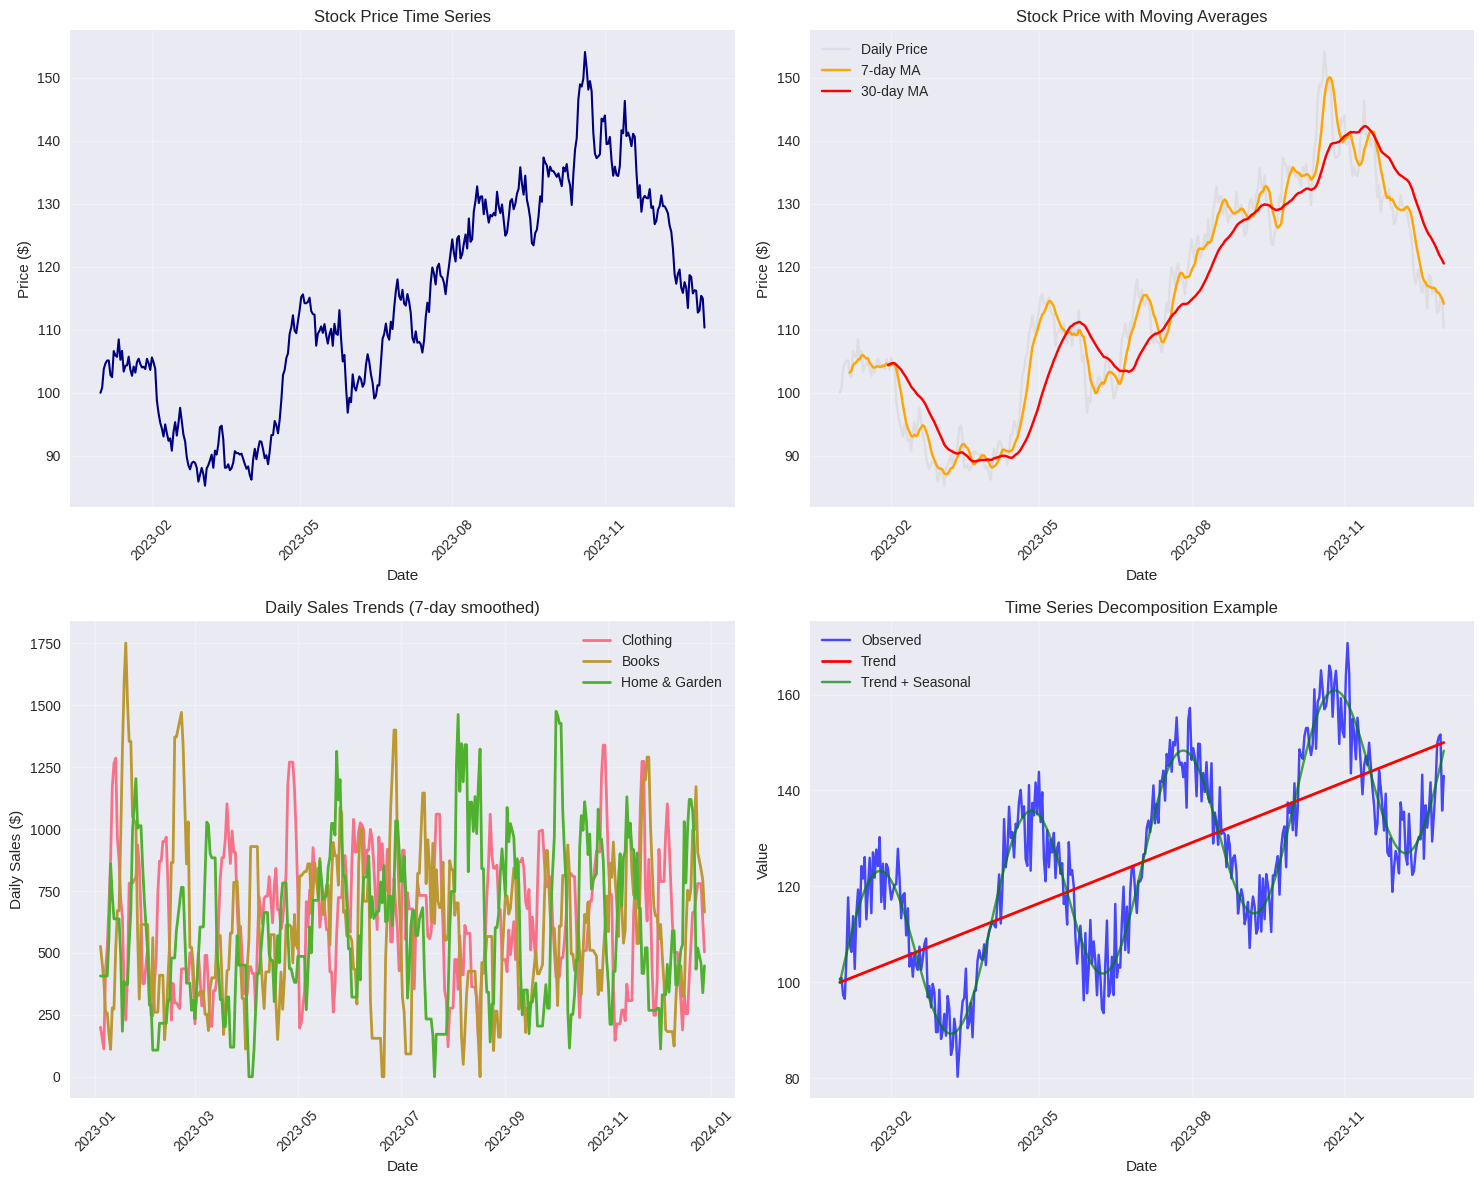

In [19]:
def create_time_series_charts():
    """Create time series visualization examples"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Basic time series
    axes[0, 0].plot(stock_df["date"], stock_df["price"], linewidth=1.5, color="navy")
    axes[0, 0].set_title("Stock Price Time Series")
    axes[0, 0].set_xlabel("Date")
    axes[0, 0].set_ylabel("Price ($)")
    axes[0, 0].grid(True, alpha=0.3)

    # Format dates
    axes[0, 0].xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
    axes[0, 0].xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    plt.setp(axes[0, 0].xaxis.get_majorticklabels(), rotation=45)

    # Rolling average
    stock_df["price_ma7"] = stock_df["price"].rolling(window=7).mean()
    stock_df["price_ma30"] = stock_df["price"].rolling(window=30).mean()

    axes[0, 1].plot(
        stock_df["date"],
        stock_df["price"],
        alpha=0.5,
        color="lightgray",
        label="Daily Price",
    )
    axes[0, 1].plot(
        stock_df["date"], stock_df["price_ma7"], color="orange", label="7-day MA"
    )
    axes[0, 1].plot(
        stock_df["date"], stock_df["price_ma30"], color="red", label="30-day MA"
    )
    axes[0, 1].set_title("Stock Price with Moving Averages")
    axes[0, 1].set_xlabel("Date")
    axes[0, 1].set_ylabel("Price ($)")
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    # Format dates
    axes[0, 1].xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
    axes[0, 1].xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    plt.setp(axes[0, 1].xaxis.get_majorticklabels(), rotation=45)

    # Multiple time series (daily sales by product)
    sales_df["date"] = pd.to_datetime(sales_df["date"])
    daily_sales = (
        sales_df.groupby(["date", "product"])["sales"].sum().unstack(fill_value=0)
    )

    # Plot top 3 products
    top_products = sales_df.groupby("product")["sales"].sum().nlargest(3).index

    for product in top_products:
        if product in daily_sales.columns:
            # Apply smoothing
            smoothed = daily_sales[product].rolling(window=7, center=True).mean()
            axes[1, 0].plot(daily_sales.index, smoothed, label=product, linewidth=2)

    axes[1, 0].set_title("Daily Sales Trends (7-day smoothed)")
    axes[1, 0].set_xlabel("Date")
    axes[1, 0].set_ylabel("Daily Sales ($)")
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

    # Format dates
    axes[1, 0].xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
    axes[1, 0].xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    plt.setp(axes[1, 0].xaxis.get_majorticklabels(), rotation=45)

    # Seasonal decomposition simulation
    # Create synthetic seasonal data
    dates = pd.date_range(start="2023-01-01", end="2023-12-31", freq="D")
    trend = np.linspace(100, 150, len(dates))
    seasonal = 20 * np.sin(
        2 * np.pi * np.arange(len(dates)) / 365.25 * 4
    )  # Quarterly pattern
    noise = np.random.normal(0, 5, len(dates))
    ts_data = trend + seasonal + noise

    axes[1, 1].plot(dates, ts_data, color="blue", alpha=0.7, label="Observed")
    axes[1, 1].plot(dates, trend, color="red", linewidth=2, label="Trend")
    axes[1, 1].plot(
        dates, trend + seasonal, color="green", alpha=0.7, label="Trend + Seasonal"
    )
    axes[1, 1].set_title("Time Series Decomposition Example")
    axes[1, 1].set_xlabel("Date")
    axes[1, 1].set_ylabel("Value")
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

    # Format dates
    axes[1, 1].xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
    axes[1, 1].xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    plt.setp(axes[1, 1].xaxis.get_majorticklabels(), rotation=45)

    plt.tight_layout()
    plt.show()


print("Creating Time Series Charts...")
create_time_series_charts()

### 7.2 Area Charts

Creating Area Charts...


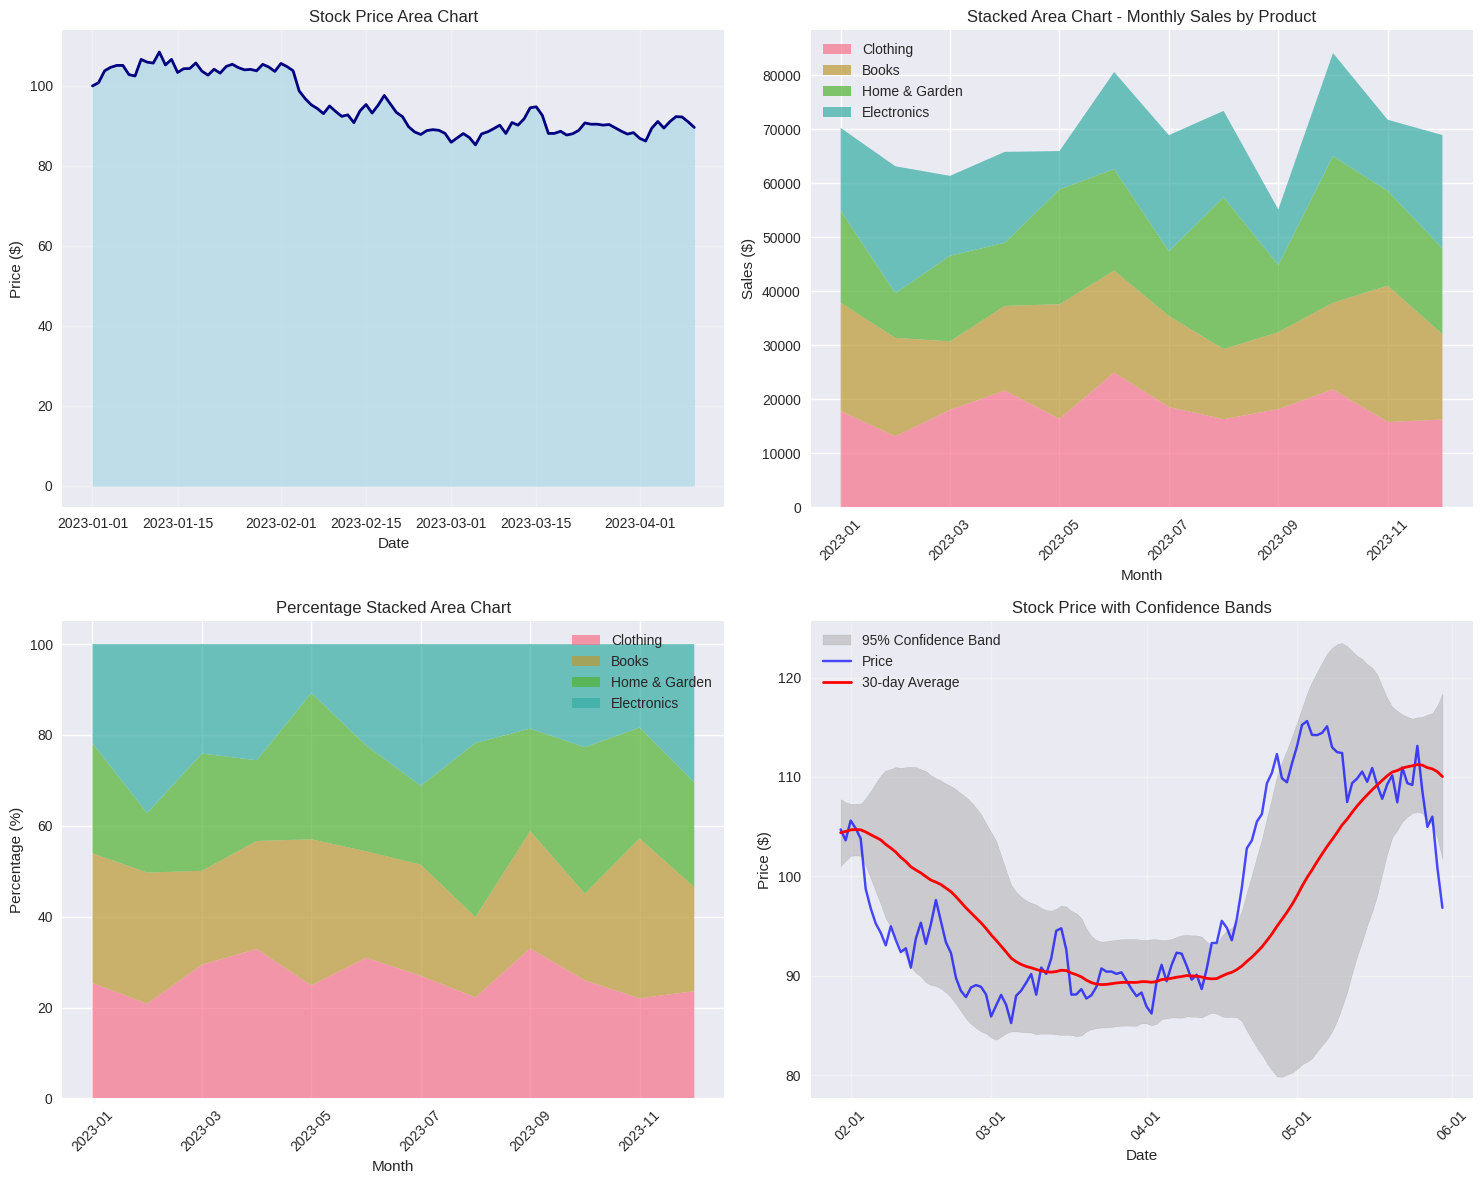

In [20]:
def create_area_charts():
    """Create area chart examples"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Simple area chart
    axes[0, 0].fill_between(
        stock_df["date"][:100], stock_df["price"][:100], alpha=0.7, color="lightblue"
    )
    axes[0, 0].plot(
        stock_df["date"][:100], stock_df["price"][:100], color="navy", linewidth=2
    )
    axes[0, 0].set_title("Stock Price Area Chart")
    axes[0, 0].set_xlabel("Date")
    axes[0, 0].set_ylabel("Price ($)")
    axes[0, 0].grid(True, alpha=0.3)

    # Stacked area chart
    # Create cumulative sales data by product
    sales_df["date"] = pd.to_datetime(sales_df["date"])
    monthly_product_sales = (
        sales_df.groupby([sales_df["date"].dt.to_period("M"), "product"])["sales"]
        .sum()
        .unstack(fill_value=0)
    )

    # Use top 4 products for clarity
    top_4_products = sales_df.groupby("product")["sales"].sum().nlargest(4).index
    monthly_subset = monthly_product_sales[top_4_products]

    axes[0, 1].stackplot(
        range(len(monthly_subset)),
        *[monthly_subset[col] for col in monthly_subset.columns],
        labels=monthly_subset.columns,
        alpha=0.7,
    )
    axes[0, 1].set_title("Stacked Area Chart - Monthly Sales by Product")
    axes[0, 1].set_xlabel("Month")
    axes[0, 1].set_ylabel("Sales ($)")
    axes[0, 1].legend(loc="upper left")

    # Set month labels
    month_labels = [
        str(period) for period in monthly_subset.index[::2]
    ]  # Every other month
    axes[0, 1].set_xticks(range(0, len(monthly_subset), 2))
    axes[0, 1].set_xticklabels(month_labels, rotation=45)

    # Percentage stacked area chart
    monthly_subset_pct = monthly_subset.div(monthly_subset.sum(axis=1), axis=0) * 100

    axes[1, 0].stackplot(
        range(len(monthly_subset_pct)),
        *[monthly_subset_pct[col] for col in monthly_subset_pct.columns],
        labels=monthly_subset_pct.columns,
        alpha=0.7,
    )
    axes[1, 0].set_title("Percentage Stacked Area Chart")
    axes[1, 0].set_xlabel("Month")
    axes[1, 0].set_ylabel("Percentage (%)")
    axes[1, 0].legend(loc="upper right")
    axes[1, 0].set_xticks(range(0, len(monthly_subset_pct), 2))
    axes[1, 0].set_xticklabels(month_labels, rotation=45)

    # Area chart with confidence bands
    # Calculate rolling statistics for stock price
    window = 30
    stock_df["rolling_mean"] = stock_df["price"].rolling(window=window).mean()
    stock_df["rolling_std"] = stock_df["price"].rolling(window=window).std()
    stock_df["upper_band"] = stock_df["rolling_mean"] + 2 * stock_df["rolling_std"]
    stock_df["lower_band"] = stock_df["rolling_mean"] - 2 * stock_df["rolling_std"]

    # Plot first 150 days for clarity
    subset_data = stock_df[:150].dropna()

    axes[1, 1].fill_between(
        subset_data["date"],
        subset_data["lower_band"],
        subset_data["upper_band"],
        alpha=0.3,
        color="gray",
        label="95% Confidence Band",
    )
    axes[1, 1].plot(
        subset_data["date"],
        subset_data["price"],
        color="blue",
        alpha=0.7,
        label="Price",
    )
    axes[1, 1].plot(
        subset_data["date"],
        subset_data["rolling_mean"],
        color="red",
        linewidth=2,
        label=f"{window}-day Average",
    )

    axes[1, 1].set_title("Stock Price with Confidence Bands")
    axes[1, 1].set_xlabel("Date")
    axes[1, 1].set_ylabel("Price ($)")
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

    # Format dates
    axes[1, 1].xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
    axes[1, 1].xaxis.set_major_locator(mdates.MonthLocator())
    plt.setp(axes[1, 1].xaxis.get_majorticklabels(), rotation=45)

    plt.tight_layout()
    plt.show()


print("Creating Area Charts...")
create_area_charts()

---

## 8. Specialized Charts {#specialized-charts}

### 8.1 Radar/Spider Charts

Creating Radar Charts...


ValueError: x and y must have same first dimension, but have shapes (6,) and (7,)

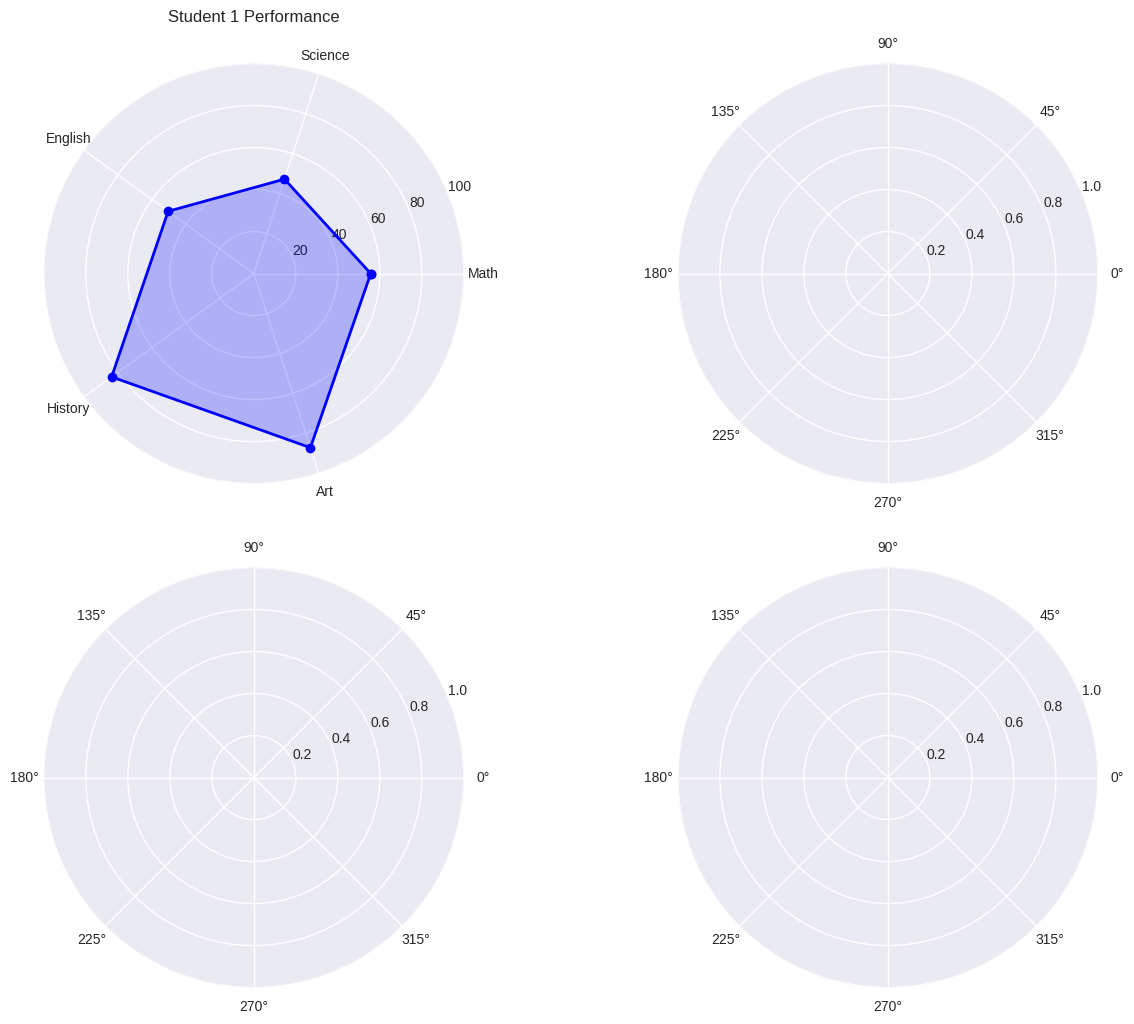

In [21]:
def create_radar_charts():
    """Create radar/spider chart examples"""

    # Function to create radar chart
    def create_radar_subplot(ax, categories, values, title, color="blue", alpha=0.25):
        # Number of variables
        N = len(categories)

        # Compute angle for each axis
        angles = [n / float(N) * 2 * np.pi for n in range(N)]
        angles += angles[:1]  # Complete the circle

        # Add values to complete the circle
        values += values[:1]

        # Plot
        ax.plot(angles, values, "o-", linewidth=2, label=title, color=color)
        ax.fill(angles, values, alpha=alpha, color=color)

        # Add labels
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(categories)
        ax.set_ylim(0, 100)
        ax.set_title(title, y=1.08)
        ax.grid(True)

    # Create figure with polar subplots
    fig, axes = plt.subplots(
        2, 2, figsize=(15, 12), subplot_kw=dict(projection="polar")
    )

    # Example 1: Student performance radar
    categories = ["Math", "Science", "English", "History", "Art"]

    # Get average student performance
    student_1 = students_df.iloc[0]
    values_1 = [
        student_1["math_score"],
        student_1["science_score"],
        student_1["english_score"],
        student_1["history_score"],
        student_1["art_score"],
    ]

    create_radar_subplot(
        axes[0, 0], categories, values_1, "Student 1 Performance", "blue", 0.25
    )

    # Example 2: Compare two students
    student_2 = students_df.iloc[1]
    values_2 = [
        student_2["math_score"],
        student_2["science_score"],
        student_2["english_score"],
        student_2["history_score"],
        student_2["art_score"],
    ]

    create_radar_subplot(axes[0, 1], categories, values_1, "Student 1", "blue", 0.15)
    create_radar_subplot(axes[0, 1], categories, values_2, "Student 2", "red", 0.15)
    axes[0, 1].legend(loc="upper right", bbox_to_anchor=(0.1, 0.1))

    # Example 3: Product performance across regions
    product_categories = ["North", "South", "East", "West", "Central"]

    # Get sales for Electronics across all regions
    electronics_sales = []
    for region in product_categories:
        region_sales = sales_df[
            (sales_df["product"] == "Electronics") & (sales_df["region"] == region)
        ]["sales"].sum()
        # Normalize to 0-100 scale
        max_sales = sales_df[sales_df["product"] == "Electronics"]["sales"].sum()
        normalized_sales = (region_sales / max_sales) * 100 if max_sales > 0 else 0
        electronics_sales.append(normalized_sales)

    create_radar_subplot(
        axes[1, 0],
        product_categories,
        electronics_sales,
        "Electronics Sales by Region",
        "green",
        0.3,
    )

    # Example 4: Multiple products comparison
    clothing_sales = []
    for region in product_categories:
        region_sales = sales_df[
            (sales_df["product"] == "Clothing") & (sales_df["region"] == region)
        ]["sales"].sum()
        max_sales = sales_df[sales_df["product"] == "Clothing"]["sales"].sum()
        normalized_sales = (region_sales / max_sales) * 100 if max_sales > 0 else 0
        clothing_sales.append(normalized_sales)

    create_radar_subplot(
        axes[1, 1], product_categories, electronics_sales, "Electronics", "blue", 0.15
    )
    create_radar_subplot(
        axes[1, 1], product_categories, clothing_sales, "Clothing", "orange", 0.15
    )
    axes[1, 1].legend(loc="upper right", bbox_to_anchor=(0.1, 0.1))

    plt.tight_layout()
    plt.show()


print("Creating Radar Charts...")
create_radar_charts()

### 8.2 Parallel Coordinates Plot

Creating Parallel Coordinates Plots...


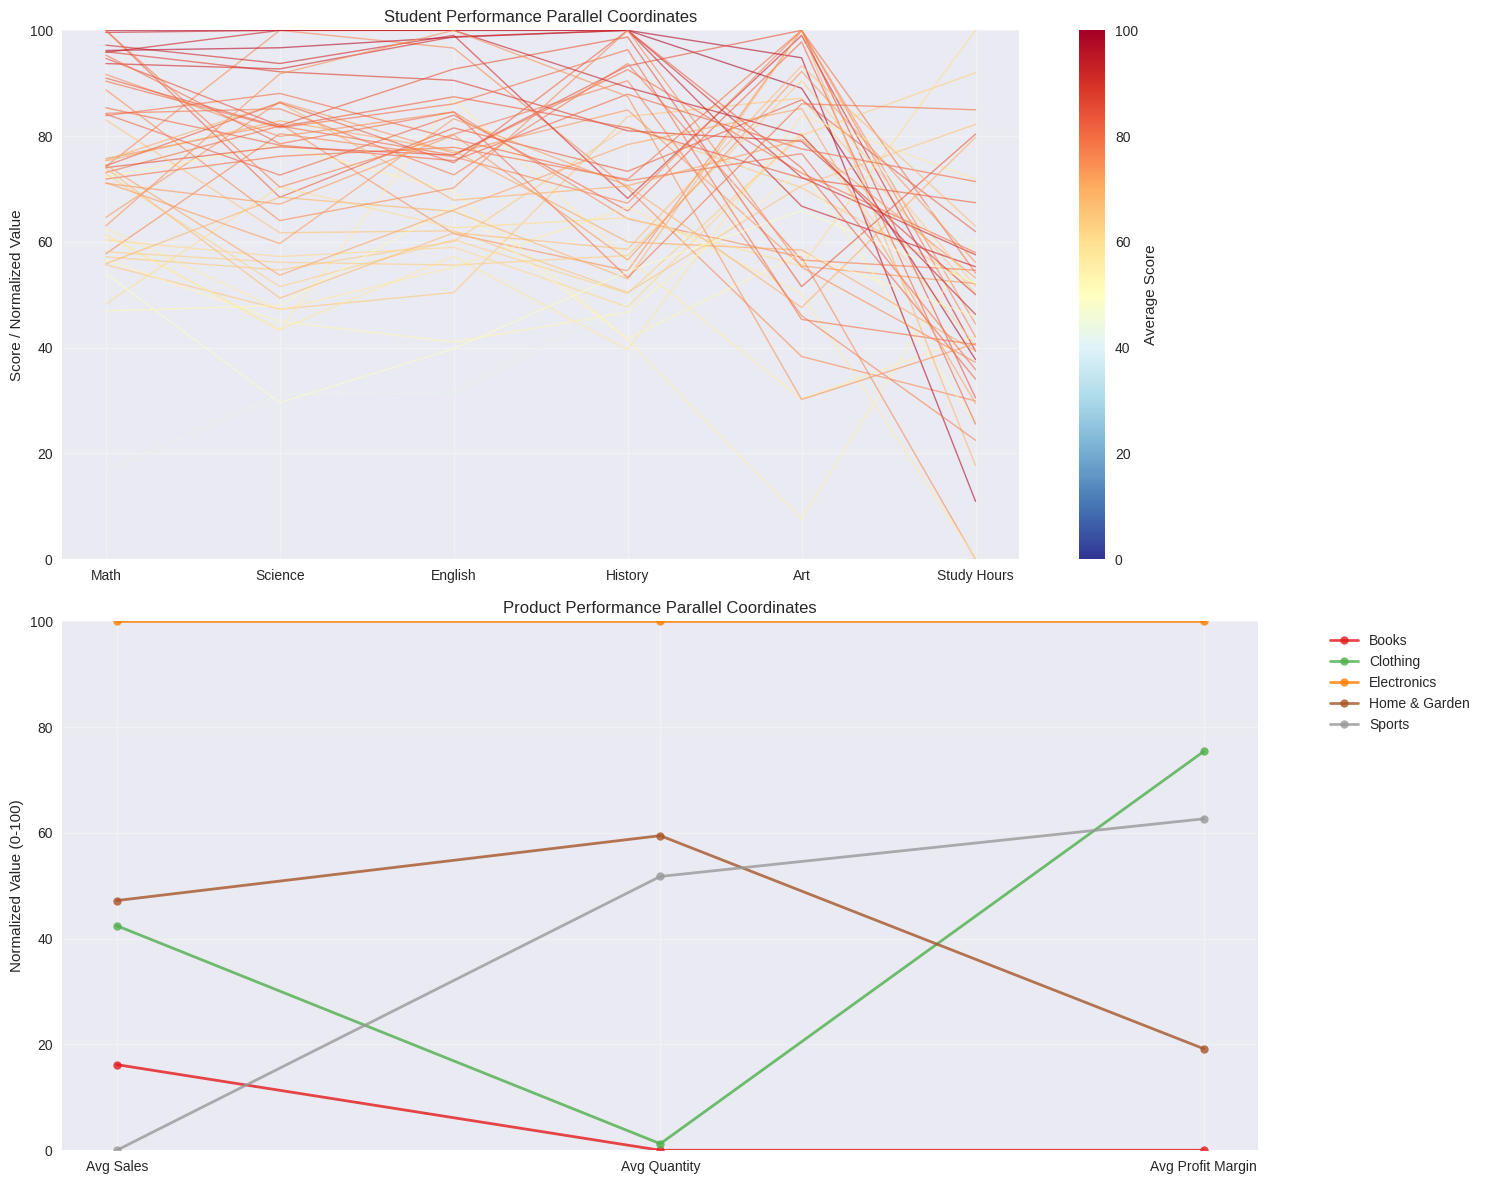

In [22]:
def create_parallel_coordinates():
    """Create parallel coordinates plot examples"""

    # Prepare data for parallel coordinates
    # Normalize student data for better visualization
    student_subset = students_df[
        [
            "math_score",
            "science_score",
            "english_score",
            "history_score",
            "art_score",
            "study_hours",
        ]
    ].head(50)

    # Normalize study_hours to 0-100 scale like scores
    student_subset = student_subset.copy()
    student_subset["study_hours_norm"] = (
        student_subset["study_hours"] / student_subset["study_hours"].max()
    ) * 100

    fig, axes = plt.subplots(2, 1, figsize=(15, 12))

    # Manual parallel coordinates plot
    categories = ["Math", "Science", "English", "History", "Art", "Study Hours"]

    # Create x positions for each category
    x_pos = np.arange(len(categories))

    # Plot lines for each student
    for idx, row in student_subset.iterrows():
        values = [
            row["math_score"],
            row["science_score"],
            row["english_score"],
            row["history_score"],
            row["art_score"],
            row["study_hours_norm"],
        ]

        # Color by overall performance
        avg_score = np.mean(values[:-1])  # Exclude study hours from average
        color = plt.cm.RdYlBu_r(avg_score / 100)  # Normalize to 0-1 for colormap

        axes[0].plot(x_pos, values, alpha=0.6, color=color, linewidth=1)

    axes[0].set_xticks(x_pos)
    axes[0].set_xticklabels(categories)
    axes[0].set_ylabel("Score / Normalized Value")
    axes[0].set_title("Student Performance Parallel Coordinates")
    axes[0].grid(True, alpha=0.3)
    axes[0].set_ylim(0, 100)

    # Add colorbar
    sm = plt.cm.ScalarMappable(
        cmap=plt.cm.RdYlBu_r, norm=plt.Normalize(vmin=0, vmax=100)
    )
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=axes[0])
    cbar.set_label("Average Score")

    # Parallel coordinates for sales data
    # Prepare sales data by product
    sales_summary = (
        sales_df.groupby("product")
        .agg({"sales": "mean", "quantity": "mean", "profit_margin": "mean"})
        .reset_index()
    )

    # Normalize all columns to 0-100 scale
    sales_normalized = sales_summary.copy()
    for col in ["sales", "quantity", "profit_margin"]:
        min_val = sales_normalized[col].min()
        max_val = sales_normalized[col].max()
        sales_normalized[f"{col}_norm"] = (
            (sales_normalized[col] - min_val) / (max_val - min_val)
        ) * 100

    # Plot parallel coordinates for products
    product_categories = ["Avg Sales", "Avg Quantity", "Avg Profit Margin"]
    x_pos_products = np.arange(len(product_categories))

    colors = plt.cm.Set1(np.linspace(0, 1, len(sales_normalized)))

    for idx, row in sales_normalized.iterrows():
        values = [row["sales_norm"], row["quantity_norm"], row["profit_margin_norm"]]
        axes[1].plot(
            x_pos_products,
            values,
            alpha=0.8,
            color=colors[idx],
            linewidth=2,
            marker="o",
            markersize=6,
            label=row["product"],
        )

    axes[1].set_xticks(x_pos_products)
    axes[1].set_xticklabels(product_categories)
    axes[1].set_ylabel("Normalized Value (0-100)")
    axes[1].set_title("Product Performance Parallel Coordinates")
    axes[1].grid(True, alpha=0.3)
    axes[1].legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    axes[1].set_ylim(0, 100)

    plt.tight_layout()
    plt.show()


print("Creating Parallel Coordinates Plots...")
create_parallel_coordinates()